# GA GStore Exploratory Data Analysis
## September 2021

Things to do here:
1. Profile the data inspecting all columns.  Examining distribution, relationship to target and other features 
1. A few hypotheses/questions/themes for exploration.
 - Does 80% of the revenue in fact come from 20% of the customers?
 - Where in the world does most of the GStore revenue come from? Where do the big purchases tend to come from?
 - How do most users arrive (traffic source) at the GStore?  Does the source method relate to the likelihood of a purchase or the size of a purchase?
 - __Are repeat visitors more likely to make a purchase?__
 - Does time of the year matter to purchase volume? Is a purchase more likely in the holiday season?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import matplotlib as mpl
mpl.style.use('seaborn')

In [3]:
os.chdir(r'D:\Springboard\Capstone 3 maybe\Google Analytics')
os.listdir()


['All features.txt',
 'e390021b-3cdc-4df0-b92e-22082e3ad15b_Data.csv',
 'GA_features.csv',
 'GA_Test.npz',
 'GA_Train.npz',
 'GA_Validation.npz',
 'GDP by Country world bank.csv',
 'life expectency by country_world bank.csv',
 'Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2763936.csv',
 'Metadata_Country_API_SP.DYN.LE00.IN_DS2_en_csv_v2_2764094.csv',
 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2763937.csv',
 'Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2763936.csv',
 'Metadata_Indicator_API_SP.DYN.LE00.IN_DS2_en_csv_v2_2764094.csv',
 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2763937.csv',
 'model.png',
 'Multicollinearity drop list.txt',
 'PercentInternetUsers World Bank.csv',
 'Population by country world bank.csv',
 'sample_submission.csv',
 'sample_submission_v2.csv',
 'test.csv',
 'test_v2.csv',
 'train.csv',
 'train_eda.csv',
 'train_v2.csv',
 'train_wrangled.csv',
 'user_train_X.csv',
 'user_train_y.csv',
 'VIF feature drop list.txt',
 'vif output.txt',


In [4]:
train = pd.read_csv('train_wrangled.csv', index_col=0, parse_dates=['date'], dtype={'fullVisitorId':'object'})

In [5]:
train.head()

channelGrouping       date        fullVisitorId  \
0  Organic Search 2016-09-02  1131660440785968503   
1  Organic Search 2016-09-02   377306020877927890   
2  Organic Search 2016-09-02  3895546263509774583   
3  Organic Search 2016-09-02  4763447161404445595   
4  Organic Search 2016-09-02    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime     browser operatingSystem  ...   campaign  \
0            1      1472830385      Chrome         Windows  ...  (not set)   
1            1      1472880147     Firefox       Macintosh  ...  (not set)   
2            1      1472865386      Chrome         Windows  ...  (not set)   
3            1      1472881213  UC Browser           Linux  ...  (not set)   
4            2      1472822600      Chrome         Android  ...  (not set)   

   source   medium          keyword visits hits pageviews bounces newVisits  \
0  google  organic   (not provided)      1    1         1       1         1   
1  google  organic   (not provided)      1    1         1       1         1   
2  google  organic   (not provided)      1    1         1       1         1   
3  google  organic  google + online      1    1         1       1         1   
4  google  organic   (not provided)      1    1         1       1         0   

  transactionRevenue  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 29 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903653 entries, 0 to 903652
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   channelGrouping       903653 non-null  object        
 1   date                  903653 non-null  datetime64[ns]
 2   fullVisitorId         903653 non-null  object        
 3   sessionId             903653 non-null  object        
 4   socialEngagementType  903653 non-null  object        
 5   visitId               903653 non-null  int64         
 6   visitNumber           903653 non-null  int64         
 7   visitStartTime        903653 non-null  int64         
 8   browser               903653 non-null  object        
 9   operatingSystem       903653 non-null  object        
 10  isMobile              903653 non-null  int64         
 11  deviceCategory        903653 non-null  object        
 12  continent             903653 non-null  object        
 13 

In [7]:
### Create a dollars column, converting transactionRevenue for plotting
train['dollars'] = train.transactionRevenue/1E6

In [8]:
### Create boolean purchase column
train['purchase'] = 1*(train.dollars>0)


## Data Profiling
Inspecting each column

#### channelGrouping

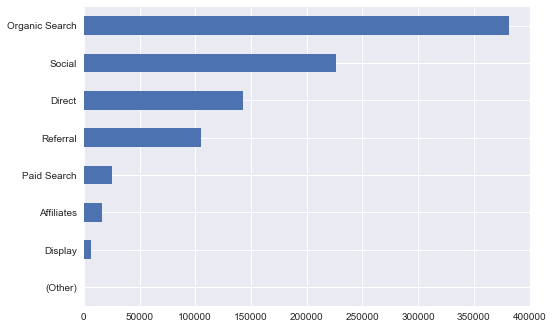

In [9]:
fig = train.channelGrouping.value_counts().sort_values().plot(kind='barh')
#plt.bar_label(fig.containers[0])
plt.show()
    

There are 8 categories with no missing data, and most of the records are from `Organic Search`. Let's see if purchases are more likely for any of these categories. 

In [10]:
train.loc[train.dollars>0,'channelGrouping'].value_counts() / train.channelGrouping.value_counts()

(Other)           0.008333
Affiliates        0.000549
Direct            0.014277
Display           0.022676
Organic Search    0.009010
Paid Search       0.018479
Referral          0.050659
Social            0.000460
Name: channelGrouping, dtype: float64

Purchases are most likely for "Referral", with 5% of visitors making a purchase.   

Function for calculating the convesion ratio, total revenue and average revenue per visit each category/object in column


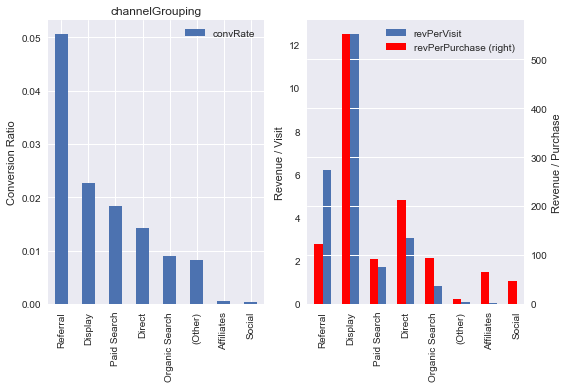

Chi2 Test, chi2: 15451.000, CramersV: 0.131, pval: 0.000


In [11]:
def Summarize_categorical(train, column,sort='categories'):
    """"""
    from scipy.stats import chi2_contingency
    
    cat_sumry = pd.DataFrame(train[column].value_counts())
    
    
    cat_sumry = cat_sumry.rename(columns={column:'Count'})
    
    cat_sumry = cat_sumry.join(train.loc[train.dollars>0,column].value_counts())
    cat_sumry = cat_sumry.rename(columns={column:'conv'})
    cat_sumry['convRate'] = cat_sumry.conv / cat_sumry.Count
    
    cat_sumry = cat_sumry.join(train.groupby(column)['dollars'].sum())
    cat_sumry['revPerVisit'] = cat_sumry.dollars / cat_sumry.Count
    cat_sumry['revPerPurchase'] = cat_sumry.dollars / cat_sumry.conv
    cat_sumry = cat_sumry.rename(columns={'dollars':'revenue'})
    cat_sumry = cat_sumry.drop(['conv','Count'],axis=1)
    
    cat_sumry = cat_sumry.join(train.groupby(column)['fullVisitorId'].agg('nunique'))
    cat_sumry = cat_sumry.rename(columns={'fullVisitorId':'uniqueUsers'})
    cat_sumry['revPerUser'] = cat_sumry.revenue / cat_sumry.uniqueUsers
    
    if sort == 'conversion': 
        cat_sumry = cat_sumry.sort_values('convRate',ascending=False)
    elif sort == 'categories':
        cat_sumry = cat_sumry.sort_index()
    

    fig,ax = plt.subplots(1,2,tight_layout=True)
    cat_sumry.plot(kind='bar',y='convRate',ax=ax[0],title=column)
    width=.3
    ax2 = cat_sumry.plot(kind='bar',y='revPerVisit', width=width,\
                   ax=ax[1],position=0, ylabel='Revenue / Visit')
    
    ax[0].set_ylabel('Conversion Ratio')
    ax3 = cat_sumry.plot(kind='bar',y='revPerPurchase', width=width,\
                   ax=ax[1],secondary_y=True,color='red',position=1)
    ax3.set_ylabel('Revenue / Purchase')
    plt.show()
    
    chi2, pval, dof, exp = chi2_contingency(pd.crosstab(train[column],train['purchase']))
    xtab = pd.crosstab(train.purchase, train[column])
    cV = np.sqrt(chi2/ (xtab.sum().sum() * (min(xtab.shape)-1)))
    print(f'Chi2 Test, chi2: {chi2:.3f}, CramersV: {cV:.3f}, pval: {pval:.3f}')
    
    return cat_sumry
cat_sum = Summarize_categorical(train,'channelGrouping',sort='conversion')

The conversion ratio (number of purchases / number of visits) is highest for the 'Referral' category.  The highest revenue per visit and revenue per purchase comes from the 'Display' category.  This column looks useful for prediction as there is a big difference in conversion and revenue among the categories. It will need to be one-hot encoded in the feature engineering phase.

#### date

In [12]:
print(train.date.min())
print(train.date.max())

2016-08-01 00:00:00
2017-08-01 00:00:00


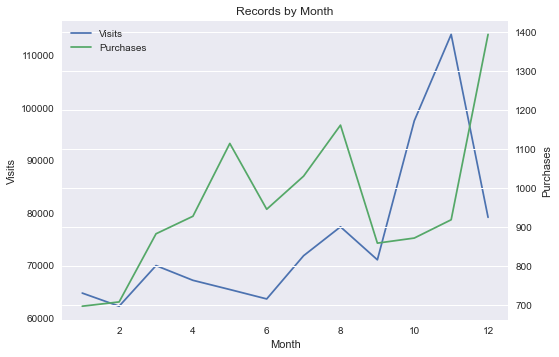

In [13]:
visits = train.date.dt.month
purchases = train.loc[train.dollars>0,'date'].dt.month

ax1 = visits.value_counts().sort_index().plot(kind='line')
plt.ylabel('Visits')
plt.xlabel('Month')


ax2 = purchases.value_counts().sort_index().plot(kind='line',secondary_y=True)
plt.ylabel('Purchases')

plt.title('Records by Month')

handles,labels = [],[]
for ax in [ax1,ax2]:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
        
plt.legend(handles,['Visits','Purchases'], loc='upper left')


plt.show()

The number of visits increased in October, November but fell in December.  Curiously the number of purchases was lower in October and Novmber, but increased greatly in December.  We would need more data over more time periods to see if these were seasonal trends.  

Skipping ahead a bit, I will convert `visitStartTime`, which has the time of the user's visit, into datetime and look at the user patterns relative to time of day, day of week, and month of the year. 

In [14]:
train['dateTime'] =  pd.to_datetime(train.visitStartTime,unit='s',origin='unix')
train['hour'] =  train.dateTime.dt.hour
train['day'] = train.dateTime.dt.dayofweek
train['weekend'] = 1 * (train.day>=5)
train['month'] = train.dateTime.dt.month

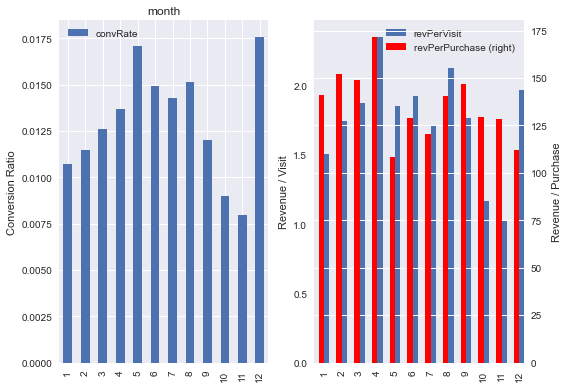

Chi2 Test, chi2: 673.906, CramersV: 0.027, pval: 0.000


In [15]:
cat_sum = Summarize_categorical(train,'month',sort='categories')

The conversion ratio is highest in December, but the revenue per perchuse is quite low, these are probably holiday gifts.  The conversion ratio is higher in the summer months and lowest in October and November.  This looks like a useful categorical feature to use for modelling.

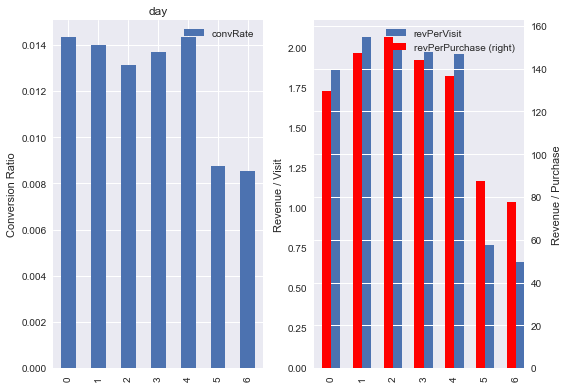

Chi2 Test, chi2: 346.723, CramersV: 0.020, pval: 0.000


In [16]:
cat_sum = Summarize_categorical(train,'day')

The conversion ratio is higher on weekdays and lower on weekends.  The conversion ratio and revenue per visit are both similar for all of the weekdays and much lower on both days of the weekend.  Because of this a boolean column representing weekday or weekend would be a good feature to use for prediction. And I already made it above! Let's take a look. 

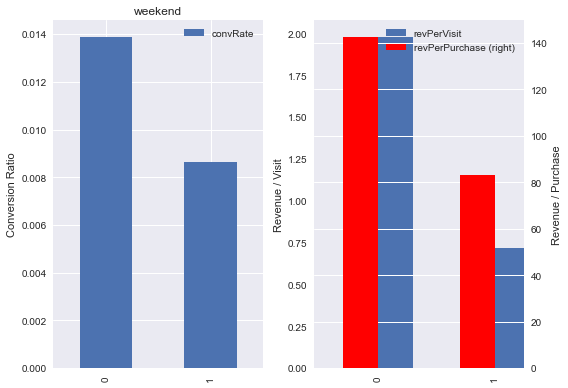

Chi2 Test, chi2: 333.945, CramersV: 0.019, pval: 0.000


In [17]:
cat_sum = Summarize_categorical(train,'weekend')

Looks good.  And now I can drop the day of week columns and plot the time of day for  visitors

In [18]:
train.drop('day',axis=1,inplace=True)

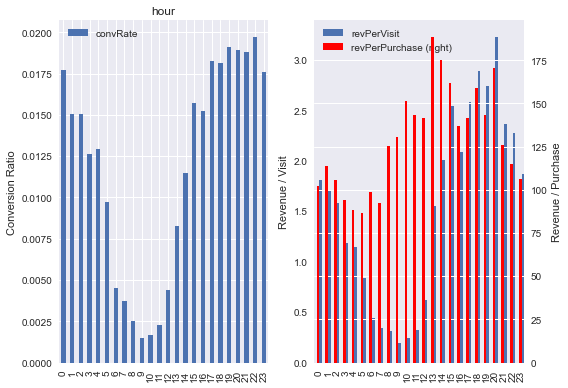

Chi2 Test, chi2: 2806.519, CramersV: 0.056, pval: 0.000


In [19]:
cat_sum = Summarize_categorical(train,'hour')

Conversion rate is lowest in the morning from 6 am to noon in the users local time.  Conversion rate is high from 5 pm through midnight. The trend for revenue per visit is very similar while the trend for revenue per purchase has less variation. This looks like a good feature for prediction.  It could be binned to reduce the number encoded columns. I will consult with Rahul before doing that.  

### fullVisitorId
Unique to each user

In [20]:
print(f"There are {train.fullVisitorId.nunique()} unique visitors in the data")

There are 714167 unique visitors in the data


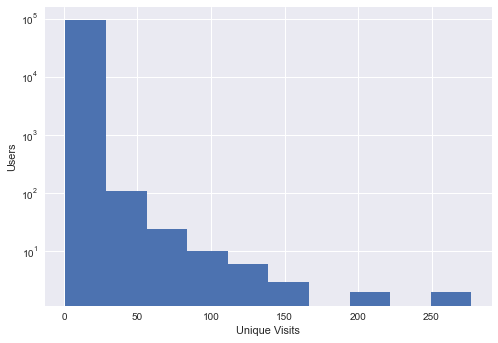

In [21]:
train[train.fullVisitorId.duplicated()]['fullVisitorId'].value_counts().hist()
plt.yscale('log')
plt.ylabel('Users')
plt.xlabel('Unique Visits')
plt.show()

In [22]:
(train[train.fullVisitorId.duplicated(keep=False)]['fullVisitorId'].value_counts()).describe()

count    93492.000000
mean         3.026762
std          3.473354
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        278.000000
Name: fullVisitorId, dtype: float64

Of those users that had multiple visits, the average is 3 visits and the maximum is 278 unique visits. That seems high, but is inline with a lognormal distributions.

I will need this column to seperate out users for input into the model and for aggregating results per user.

### sessionId

In [23]:
train.sessionId.nunique()/train.shape[0]

0.9990062557198394

In [24]:
### 99.9% of visits are unique?
print(train.loc[train.sessionId.duplicated()].shape)
train.loc[train.sessionId.duplicated()].head()

(898, 35)


channelGrouping       date        fullVisitorId  \
50181  Organic Search 2017-06-24  7980925080669177483   
78892     Paid Search 2017-06-16  0996739878901151740   
80071     Paid Search 2017-06-16  9107294226500038587   
89617     Paid Search 2016-11-30   946085548949296102   
89962  Organic Search 2016-11-30  7817946123013268752   

                            sessionId  socialEngagementType     visitId  \
50181  7980925080669177483_1498285182  Not Socially Engaged  1498285182   
78892  0996739878901151740_1497682650  Not Socially Engaged  1497682650   
80071  9107294226500038587_1497681738  Not Socially Engaged  1497681738   
89617   946085548949296102_1480492063  Not Socially Engaged  1480492063   
89962  7817946123013268752_1480492790  Not Socially Engaged  1480492790   

       visitNumber  visitStartTime browser operatingSystem  ...  pageviews  \
50181            1      1498287677  Safari             iOS  ...         13   
78892            1      1497682650  Safari             iOS  ...          1   
80071            1      1497681738  Chrome         Windows  ...          4   
89617            1      1480492882  Chrome         Windows  ...          7   
89962            1      1480492842  Chrome         Windows  ...         35   

      bounces newVisits transactionRevenue dollars purchase  \
50181       0         1                  0     0.0        0   
78892       1         1                  0     0.0        0   
80071       0         1                  0     0.0        0   
89617       0         1                  0     0.0        0   
89962       0         1                  0     0.0        0   

                 dateTime hour weekend month  
50181 2017-06-24 07:01:17    7       1     6  
78892 2017-06-17 06:57:30    6       1     6  
80071 2017-06-17 06:42:18    6       1     6  
89617 2016-11-30 08:01:22    8       0    11  
89962 2016-11-30 08:00:42    8       0    11  

[5 rows x 35 columns]

This is a combination of `fullVisitorId` and `visitId` and it should be unique... but it's not.  

In [25]:
session_dups = train.loc[train.sessionId.duplicated(),'sessionId']
session_dups = train[train.sessionId.isin(session_dups)] 
print(session_dups.shape)
session_dups.sort_values('sessionId').head()

(1796, 35)


channelGrouping       date        fullVisitorId  \
212026  Organic Search 2016-08-21  0011338928267756760   
82177   Organic Search 2016-08-22  0011338928267756760   
802549        Referral 2017-01-01  0014884852016449602   
848579        Referral 2016-12-31  0014884852016449602   
428607  Organic Search 2017-06-05  0019612470994343873   

                             sessionId  socialEngagementType     visitId  \
212026  0011338928267756760_1471848731  Not Socially Engaged  1471848731   
82177   0011338928267756760_1471848731  Not Socially Engaged  1471848731   
802549  0014884852016449602_1483257533  Not Socially Engaged  1483257533   
848579  0014884852016449602_1483257533  Not Socially Engaged  1483257533   
428607  0019612470994343873_1496731675  Not Socially Engaged  1496731675   

        visitNumber  visitStartTime browser operatingSystem  ...  pageviews  \
212026            1      1471848731  Chrome         Windows  ...          1   
82177             1      1471849330  Chrome         Windows  ...          1   
802549            2      1483257729  Chrome       Macintosh  ...          6   
848579            2      1483257533  Chrome       Macintosh  ...          1   
428607           24      1496731675  Chrome       Macintosh  ...         14   

       bounces newVisits transactionRevenue dollars purchase  \
212026       0         1                  0     0.0        0   
82177        0         1                  0     0.0        0   
802549       0         0                  0     0.0        0   
848579       1         0                  0     0.0        0   
428607       0         0                  0     0.0        0   

                  dateTime hour weekend month  
212026 2016-08-22 06:52:11    6       0     8  
82177  2016-08-22 07:02:10    7       0     8  
802549 2017-01-01 08:02:09    8       1     1  
848579 2017-01-01 07:58:53    7       1     1  
428607 2017-06-06 06:47:55    6       0     6  

[5 rows x 35 columns]

It looks like the `visitId` should be the same as `visitStartTime` but in some cases it isn't. How many?

In [26]:
sum( train.sessionId.duplicated() & (train.visitId != train.visitStartTime) )
#sum(train.visitId != train.visitStartTime)

377

That is a lot more than the 890 `sessionId` duplicates.  Regardless, it should be a completely unique string to that record, and won't be used for modelling. I will fix the `visitId` column in due course.

### socialEngagementType

In [27]:
train.socialEngagementType.value_counts()

Not Socially Engaged    903653
Name: socialEngagementType, dtype: int64

Every single record is the same thing, so no information value, I'll drop it now.

In [28]:
train.drop('socialEngagementType',axis=1,inplace=True)

### visitId
Now I need to resolve the above where `visitId` was causing non-unique sessionId.  I believe this was mostly due to `visitId` not being equal to `visitStartTime`.

In [29]:
train[(train.visitId != train.visitStartTime)][['fullVisitorId','sessionId','visitId','visitStartTime']].sort_values('fullVisitorId')

fullVisitorId                       sessionId     visitId  \
152554  0005398476761826798  0005398476761826798_1490838879  1490838879   
82177   0011338928267756760  0011338928267756760_1471848731  1471848731   
732219  0012561433643490595  0012561433643490595_1496206799  1496206799   
426792  0014347584561790138  0014347584561790138_1496678973  1496678973   
802549  0014884852016449602  0014884852016449602_1483257533  1483257533   
...                     ...                             ...         ...   
402939   999203594099745000   999203594099745000_1475861273  1475861273   
173929  9994016428937556552  9994016428937556552_1479443720  1479443720   
763832  9994269553476366457  9994269553476366457_1471992348  1471992348   
277525  9996772840159974760  9996772840159974760_1480611114  1480611114   
391925  9996772840159974760  9996772840159974760_1472575723  1472575723   

        visitStartTime  
152554      1490838889  
82177       1471849330  
732219      1496206803  
426792      1496678982  
802549      1483257729  
...                ...  
402939      1475861278  
173929      1479443726  
763832      1471992353  
277525      1480611119  
391925      1472575728  

[4709 rows x 4 columns]

In [30]:
train['visitTimeError'] = train.visitStartTime - train.visitId

In [31]:
#mask = train.visitTimeError<10
#train.loc[mask,'visitId2'] = train.visitStartTime
#train.loc[~mask,'visitId2'] = train.visitId

train['visitId2'] = train.visitStartTime
train = train.astype({'visitId2':int})

train['sessionId2'] = train.fullVisitorId + '_'+train.visitId2.astype('str')

In [32]:
sum(train.duplicated(subset=['fullVisitorId','visitId2'],keep=False))

0

No more duplicates sessionId's.  Time for a little clean up. 

In [33]:
train['visitId'] = train.visitId2
train['sessionId'] = train.sessionId2
train.drop(['visitId2','sessionId2','visitTimeError'],axis=1,inplace=True)


Fixed erroneous `visitId` and `sessionId`, but now I need to update the `visitNumber` for records that are duplicated.

### visitNumber

After fixing the erroneous `visitorId` values I now have non-unique `visitNumber`'s for some users.

In [34]:
train[train.duplicated(subset=['fullVisitorId','visitNumber'],keep=False)].sort_values(['fullVisitorId','visitNumber'])[['fullVisitorId','sessionId','visitNumber','visitStartTime']].tail(20)

fullVisitorId                       sessionId  visitNumber  \
388316  9952616174324085427  9952616174324085427_1478111552            2   
422245  9952616174324085427  9952616174324085427_1473867034            2   
333499  9952616174324085427  9952616174324085427_1478307484            3   
422298  9952616174324085427  9952616174324085427_1473872665            3   
22139   9952616174324085427  9952616174324085427_1478797725            4   
381262  9952616174324085427  9952616174324085427_1474045575            4   
382042  9952616174324085427  9952616174324085427_1474063950            5   
613745  9952616174324085427  9952616174324085427_1479760668            5   
192439  9952616174324085427  9952616174324085427_1479871076            6   
556190  9952616174324085427  9952616174324085427_1474306130            6   
89529   9952616174324085427  9952616174324085427_1480524313            7   
556181  9952616174324085427  9952616174324085427_1474320192            7   
416728  9952616174324085427  9952616174324085427_1480954032            8   
739084  9952616174324085427  9952616174324085427_1474473613            8   
293658  9962238979859303379  9962238979859303379_1486454717            3   
685847  9962238979859303379  9962238979859303379_1486453289            3   
12850   9977581648088561831  9977581648088561831_1470984228            1   
430308  9977581648088561831  9977581648088561831_1487140050            1   
107456  9982796479074715794  9982796479074715794_1494544237            1   
734707  9982796479074715794  9982796479074715794_1478353150            1   

        visitStartTime  
388316      1478111552  
422245      1473867034  
333499      1478307484  
422298      1473872665  
22139       1478797725  
381262      1474045575  
382042      1474063950  
613745      1479760668  
192439      1479871076  
556190      1474306130  
89529       1480524313  
556181      1474320192  
416728      1480954032  
739084      1474473613  
293658      1486454717  
685847      1486453289  
12850       1470984228  
430308      1487140050  
107456      1494544237  
734707      1478353150

The visit number is simply a sequential record of the visits to the website.  I can replace it with a rank of the `visitStartTime` for each user.  I have also noticed that in the data some users have already visited in prior to this data period, so their minimum `visitNumber` is > 1, and I will keep my new ranking consistent with this.  

In [35]:
### Create ranks and mins for each user

visit_ranks = train.groupby('fullVisitorId')[['visitStartTime']].rank().astype(int)
visit_ranks = visit_ranks.rename(columns={'visitStartTime':'visitRanks'})

visit_mins = train.groupby('fullVisitorId')[['visitNumber']].min()
visit_mins = visit_mins.rename(columns={'visitNumber':'visitMin'}).reset_index()
print(sum(visit_mins.visitMin>1))


12544


In [36]:
train = pd.concat([train,visit_ranks],axis=1)
train = train.merge(visit_mins,how='left',on='fullVisitorId',validate='m:1')
train['visitNumber2'] = train.visitMin - 1 + train.visitRanks
train

channelGrouping       date        fullVisitorId  \
0       Organic Search 2016-09-02  1131660440785968503   
1       Organic Search 2016-09-02   377306020877927890   
2       Organic Search 2016-09-02  3895546263509774583   
3       Organic Search 2016-09-02  4763447161404445595   
4       Organic Search 2016-09-02    27294437909732085   
...                ...        ...                  ...   
903648          Social 2017-01-04  5123779100307500332   
903649          Social 2017-01-04  7231728964973959842   
903650          Social 2017-01-04  5744576632396406899   
903651          Social 2017-01-04  2709355455991750775   
903652          Social 2017-01-04  0814900163617805053   

                             sessionId     visitId  visitNumber  \
0       1131660440785968503_1472830385  1472830385            1   
1        377306020877927890_1472880147  1472880147            1   
2       3895546263509774583_1472865386  1472865386            1   
3       4763447161404445595_1472881213  1472881213            1   
4         27294437909732085_1472822600  1472822600            2   
...                                ...         ...          ...   
903648  5123779100307500332_1483554750  1483554750            1   
903649  7231728964973959842_1483543798  1483543798            1   
903650  5744576632396406899_1483526434  1483526434            1   
903651  2709355455991750775_1483592864  1483592864            1   
903652  0814900163617805053_1483574474  1483574474            1   

        visitStartTime          browser operatingSystem  isMobile  ...  \
0           1472830385           Chrome         Windows         0  ...   
1           1472880147          Firefox       Macintosh         0  ...   
2           1472865386           Chrome         Windows         0  ...   
3           1472881213       UC Browser           Linux         0  ...   
4           1472822600           Chrome         Android         1  ...   
...                ...              ...             ...       ...  ...   
903648      1483554750           Chrome         Windows         0  ...   
903649      1483543798           Chrome         Android         1  ...   
903650      1483526434  Android Webview         Android         1  ...   
903651      1483592864           Chrome         Windows         0  ...   
903652      1483574474           Chrome         Android         1  ...   

       transactionRevenue dollars purchase            dateTime hour weekend  \
0                       0     0.0        0 2016-09-02 15:33:05   15       0   
1                       0     0.0        0 2016-09-03 05:22:27    5       1   
2                       0     0.0        0 2016-09-03 01:16:26    1       1   
3                       0     0.0        0 2016-09-03 05:40:13    5       1   
4                       0     0.0        0 2016-09-02 13:23:20   13       0   
...                   ...     ...      ...                 ...  ...     ...   
903648                  0     0.0        0 2017-01-04 18:32:30   18       0   
903649                  0     0.0        0 2017-01-04 15:29:58   15       0   
903650                  0     0.0        0 2017-01-04 10:40:34   10       0   
903651                  0     0.0        0 2017-01-05 05:07:44    5       0   
903652                  0     0.0        0 2017-01-05 00:01:14    0       0   

       month visitRanks visitMin visitNumber2  
0          9          1        1            1  
1          9          1        1            1  
2          9          1        1            1  
3          9          1        1            1  
4          9          2        1            2  
...      ...        ...      ...          ...  
903648     1          1        1            1  
903649     1          1        1            1  
903650     1          1        1            1  
903651     1          1        1            1  
903652     1          1        1            1  

[903653 rows x 37 columns]

In [37]:
print(f"Fixed {sum(train.visitNumber!=train.visitNumber2)} bad visitNumber's")

Fixed 16750 bad visitNumber's


I'll replace the `visitNumber` with this new column that doesn't have duplicates, and then clean up the unnecessary columns

In [38]:
train['visitNumber'] = train.visitNumber2
train.drop(['visitRanks','visitMin','visitNumber2'],axis=1,inplace=True)

Quick histogram of number of user visits

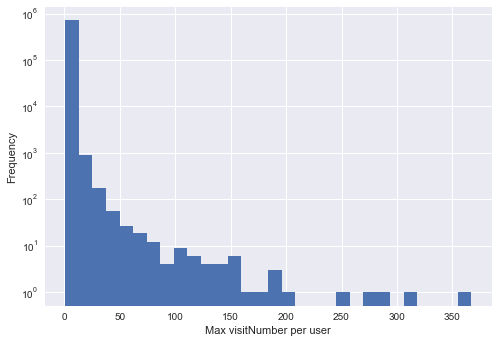

In [39]:
train.groupby('fullVisitorId')['visitNumber'].max().hist(bins=30)
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Max visitNumber per user')
plt.show()

That looks like a reasonable distribution for the visitsNumber of the users. Later I will look into if repeated visits are more likely to result in a purchase.  

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903653 entries, 0 to 903652
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   date                903653 non-null  datetime64[ns]
 2   fullVisitorId       903653 non-null  object        
 3   sessionId           903653 non-null  object        
 4   visitId             903653 non-null  int32         
 5   visitNumber         903653 non-null  int64         
 6   visitStartTime      903653 non-null  int64         
 7   browser             903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   isMobile            903653 non-null  int64         
 10  deviceCategory      903653 non-null  object        
 11  continent           903653 non-null  object        
 12  subContinent        903653 non-null  object        
 13  country             903653 no

### visitStartTime
timestamp integer, the time the user first accessed the page. 

In [41]:
train.visitStartTime.head()

0    1472830385
1    1472880147
2    1472865386
3    1472881213
4    1472822600
Name: visitStartTime, dtype: int64

In [42]:
train['time'] = train.dateTime.dt.hour + train.dateTime.dt.minute/60 + train.dateTime.dt.second/360
train[['dateTime','time']].head()

dateTime       time
0 2016-09-02 15:33:05  15.563889
1 2016-09-03 05:22:27   5.441667
2 2016-09-03 01:16:26   1.338889
3 2016-09-03 05:40:13   5.702778
4 2016-09-02 13:23:20  13.438889

hmmmm are these local times or a standard time?

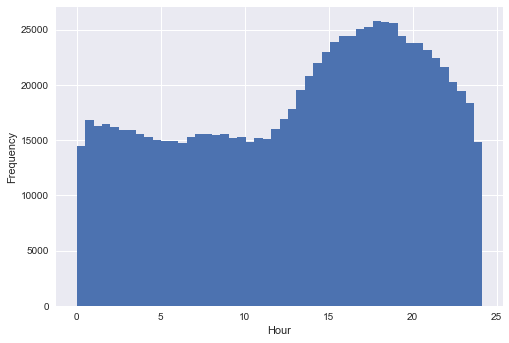

In [43]:
train.time.hist(bins=48)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


Let's check the distribution of California users versus New York users. If the distributions are shifted then I can assume they are not local times

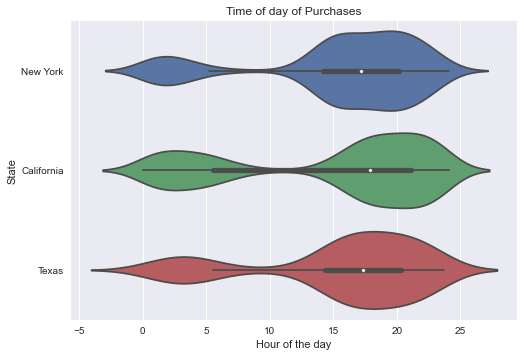

In [44]:
sns.violinplot(data=train[((train.region=='California') | (train.region=='New York') | (train.region=='Texas')) &\
                          (train.dollars>0)], y='region', x='time')
plt.title('Time of day of Purchases')
plt.ylabel('State')
plt.xlabel('Hour of the day')
plt.show()

From the violin plots it looks like the visit times in the data are local, which is good and should be useful for prediction.


One potentially useful feature could be, for repeat visits, the time since the last visit to the store. I will create that now. 

In [45]:
visittime = train[['fullVisitorId','visitNumber','visitStartTime']]
### subtract 1 to merge visitStartTime back to train on the previous visit
visittime['visitNumber'] = visittime.visitNumber + 1
visittime = visittime.rename(columns = {'visitStartTime':'previousVisitTime'})
visittime.head()

C:\Users\blain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


fullVisitorId  visitNumber  previousVisitTime
0  1131660440785968503            2         1472830385
1   377306020877927890            2         1472880147
2  3895546263509774583            2         1472865386
3  4763447161404445595            2         1472881213
4    27294437909732085            3         1472822600

In [46]:
train = train.merge(visittime,how='left',on=['fullVisitorId','visitNumber'])

train['timeDiffLastVisit'] = train.visitStartTime - train.previousVisitTime
train.head()

channelGrouping       date        fullVisitorId  \
0  Organic Search 2016-09-02  1131660440785968503   
1  Organic Search 2016-09-02   377306020877927890   
2  Organic Search 2016-09-02  3895546263509774583   
3  Organic Search 2016-09-02  4763447161404445595   
4  Organic Search 2016-09-02    27294437909732085   

                        sessionId     visitId  visitNumber  visitStartTime  \
0  1131660440785968503_1472830385  1472830385            1      1472830385   
1   377306020877927890_1472880147  1472880147            1      1472880147   
2  3895546263509774583_1472865386  1472865386            1      1472865386   
3  4763447161404445595_1472881213  1472881213            1      1472881213   
4    27294437909732085_1472822600  1472822600            2      1472822600   

      browser operatingSystem  isMobile  ... transactionRevenue dollars  \
0      Chrome         Windows         0  ...                  0     0.0   
1     Firefox       Macintosh         0  ...                  0     0.0   
2      Chrome         Windows         0  ...                  0     0.0   
3  UC Browser           Linux         0  ...                  0     0.0   
4      Chrome         Android         1  ...                  0     0.0   

  purchase            dateTime hour weekend month       time  \
0        0 2016-09-02 15:33:05   15       0     9  15.563889   
1        0 2016-09-03 05:22:27    5       1     9   5.441667   
2        0 2016-09-03 01:16:26    1       1     9   1.338889   
3        0 2016-09-03 05:40:13    5       1     9   5.702778   
4        0 2016-09-02 13:23:20   13       0     9  13.438889   

  previousVisitTime timeDiffLastVisit  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4      1.470838e+09         1984314.0  

[5 rows x 37 columns]

In [47]:
train.drop('previousVisitTime',axis=1,inplace=True)

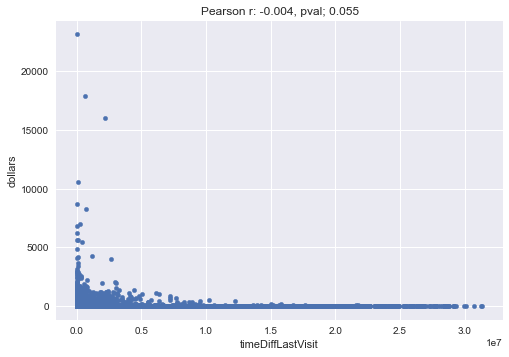

In [48]:
from scipy.stats import pearsonr

r, pval = pearsonr(train[train.timeDiffLastVisit.isna()==False].timeDiffLastVisit,\
               train[train.timeDiffLastVisit.isna()==False].dollars)

train.plot(kind='scatter',x='timeDiffLastVisit',y='dollars')
plt.title(f'Pearson r: {r:.3f}, pval; {pval:.3f}')
plt.show()

There is a very weak negative correlation for the created `timeDiffLastVisit` and the size of the transaction, and the p-value is 5.5% which is on the margin of being a statistically significant association.  Is it correlated with the likelyhood of a purchase?  I will do a quick logistic regression to see if `timeDiffLastVisit` has any predictive power for wether there was a purchase or not. 

In [49]:
### quick logistic regression to see if 'timeDiffLastVisit' can predict purchase


test_set = train.loc[train.timeDiffLastVisit.isna()==False,['timeDiffLastVisit','purchase']].reset_index(drop=True)
X = test_set[['timeDiffLastVisit']].to_numpy()
y = test_set['purchase'].to_numpy()
print('Fraction of records with purchase:\n{:.3f}'.format(sum(y)/len(y)))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,stratify=y)
logr = LogisticRegression(class_weight='balanced')
logr.fit(X_train,y_train)
print('Logistic Regression Accuracy:\n{:.3f}'.format(logr.score(X_test,y_test)))
print('AUC:\n{:.3f}'.format(roc_auc_score(y_test,logr.predict(X_test))))


Fraction of records with purchase:
0.036
Logistic Regression Accuracy:
0.964
AUC:
0.500


This calculated column that represents the time difference from the previous visit has does not appear to have much predictive power for a purchase. But I will keep it for now.  What to do with the null values???

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903653 entries, 0 to 903652
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   date                903653 non-null  datetime64[ns]
 2   fullVisitorId       903653 non-null  object        
 3   sessionId           903653 non-null  object        
 4   visitId             903653 non-null  int32         
 5   visitNumber         903653 non-null  int64         
 6   visitStartTime      903653 non-null  int64         
 7   browser             903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   isMobile            903653 non-null  int64         
 10  deviceCategory      903653 non-null  object        
 11  continent           903653 non-null  object        
 12  subContinent        903653 non-null  object        
 13  country             903653 no

### browser

In [51]:
### Look at the prevelance in the data
#train[train.dollars>0].browser.value_counts()/train[train.dollars>0].shape[0]
train.browser.value_counts()/train.shape[0]

Chrome                                         0.686507
Safari                                         0.201676
Firefox                                        0.041021
Internet Explorer                              0.021441
Edge                                           0.011293
Android Webview                                0.008704
Safari (in-app)                                0.007580
Opera Mini                                     0.006794
Opera                                          0.006245
UC Browser                                     0.002686
YaBrowser                                      0.002319
Coc Coc                                        0.000805
Amazon Silk                                    0.000621
Android Browser                                0.000612
Mozilla Compatible Agent                       0.000414
MRCHROME                                       0.000291
Maxthon                                        0.000272
BlackBerry                                     0

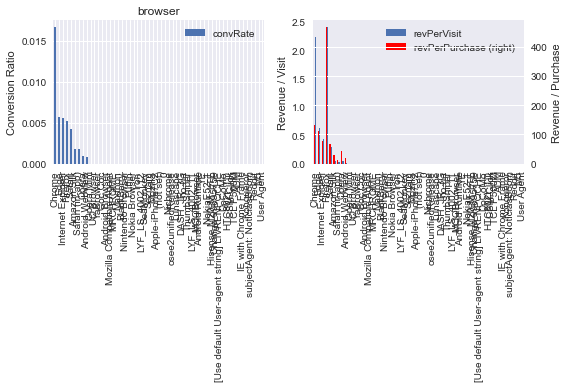

Chi2 Test, chi2: 2491.321, CramersV: 0.053, pval: 0.000


In [52]:
cat_sum = Summarize_categorical(train,'browser',sort='conversion')

A lot of browsers have very low representation in the data, and many don't account for any purchases.  I will lump all of the browsers with less than 1% representation into another category called "Other"

In [53]:
cat_sum.head(10)

convRate     revenue  revPerVisit  revPerPurchase  \
Chrome             0.016689  1383104.96     2.229506      133.594606   
Edge               0.005683     6482.97     0.635274      111.775345   
Internet Explorer  0.005626     8255.55     0.426093       75.738991   
Firefox            0.005153    89316.32     2.409461      467.624712   
Safari             0.004280    52397.48     0.287511       67.176256   
Amazon Silk        0.001783       29.99     0.053458       29.990000   
Safari (in-app)    0.001752      153.77     0.022448       12.814167   
Opera              0.000886      215.35     0.038162       43.070000   
Android Webview    0.000763      114.85     0.014603       19.141667   
Opera Mini              NaN        0.00     0.000000             NaN   

                   uniqueUsers  revPerUser  
Chrome                  467810    2.956553  
Edge                      8831    0.734115  
Internet Explorer        17587    0.469412  
Firefox                  31452    2.839766  
Safari                  157054    0.333627  
Amazon Silk                430    0.069744  
Safari (in-app)           6282    0.024478  
Opera                     5185    0.041533  
Android Webview           7087    0.016206  
Opera Mini                5850    0.000000

In [54]:
keepers = set(['Chrome','Safari','Firefox','Internet Explorer','Edge','Amazon Silk','Safari (in-app)','Opera','Android Webview'])
browsers = set(train.browser.unique())

In [55]:
lump = list(browsers-keepers)
lump = {key:'Other' for key in lump}
keepers = {key:key for key in keepers}
lump.update(keepers)

In [56]:
train['browser'] = train.browser.map(lump)
del keepers,browsers,lump

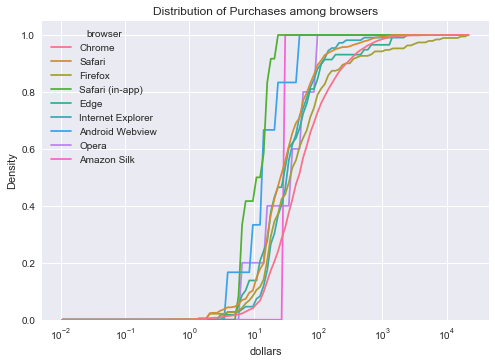

In [57]:
sns.histplot(data=train[train.dollars>0], log_scale=True, x='dollars',hue='browser', stat='density',cumulative=True,common_norm=False, element='poly',fill=False)
plt.title('Distribution of Purchases among browsers')
plt.show()

Done.  It looks like purchases on 'Chrome' tend to be larger than those on other browsers, and purchases on 'Other' browsers tends to be small.

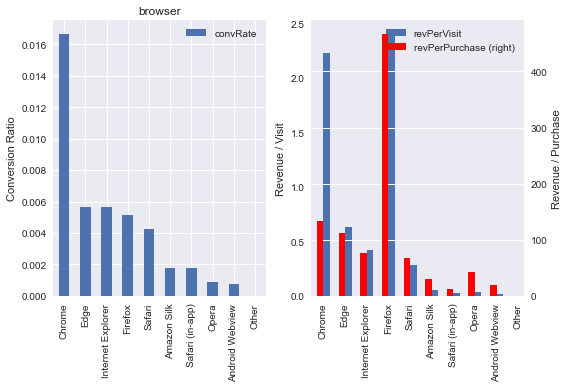

Chi2 Test, chi2: 2491.321, CramersV: 0.053, pval: 0.000


In [58]:
cat_sum = Summarize_categorical(train,'browser',sort='conversion')

The conversion ratio is highest on 'Chrome,' no surprise there.  Users of Chrome are more likely fan's of Google and would be more likely to make a purchase.  There is not much difference in conversion rate between 'Edge' and 'Internet Explorer' but the revenue per visit values are more different.  I will leave them seperate for now. Interestingly the revenue per visit for Firefox users is higher than the rest, even 'Chrome' users.  The 'Other' browsers don't account for any purchases.  I believe this column will be useful for modelling. 

### operatingSystem

In [59]:
train.operatingSystem.value_counts()/train.shape[0]

Windows          0.387396
Macintosh        0.281013
Android          0.137101
iOS              0.119144
Linux            0.038769
Chrome OS        0.029145
(not set)        0.005196
Windows Phone    0.001346
Samsung          0.000310
BlackBerry       0.000241
Nintendo Wii     0.000111
Firefox OS       0.000098
Xbox             0.000073
Nintendo WiiU    0.000039
FreeBSD          0.000010
OpenBSD          0.000002
Nokia            0.000002
Nintendo 3DS     0.000001
NTT DoCoMo       0.000001
SunOS            0.000001
Name: operatingSystem, dtype: float64

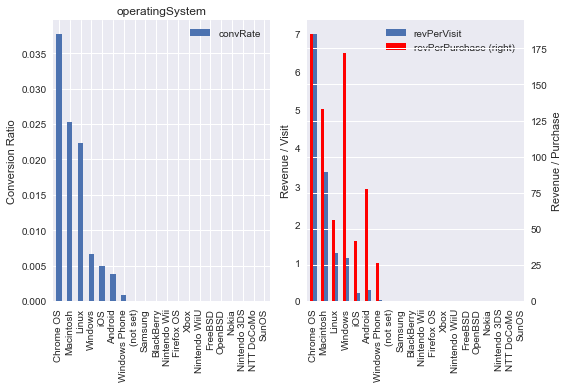

Chi2 Test, chi2: 7194.516, CramersV: 0.089, pval: 0.000


In [60]:
cat_sum = Summarize_categorical(train,'operatingSystem',sort='conversion')

Again I will repeat the process above to lump low representative categories into "Other".  The other 

In [61]:
keepers = set(['Windows','Macintosh','Android','iOS','Linux','Chrome OS','Windows Phone'])
ops = set(train.operatingSystem.unique())
lump = ops-keepers
lump = {key:'Other' for key in lump}
lump.update({key:key for key in keepers})
train['operatingSystem'] = train.operatingSystem.map(lump)
del keepers,ops,lump

In [62]:
train.operatingSystem.value_counts()
### Number of visits

Windows          350072
Macintosh        253938
Android          123892
iOS              107665
Linux             35034
Chrome OS         26337
Other              5499
Windows Phone      1216
Name: operatingSystem, dtype: int64

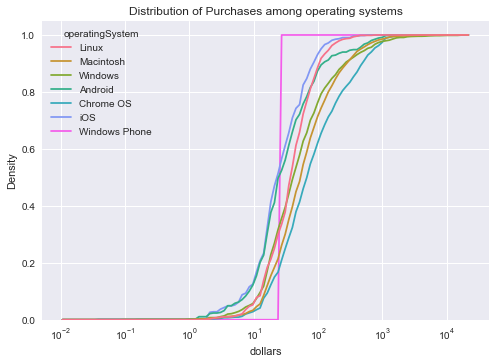

In [63]:
sns.histplot(data=train[train.dollars>0], log_scale=True, x='dollars',hue='operatingSystem', stat='density', common_norm=False, element='poly',cumulative=True,fill=False)
plt.title('Distribution of Purchases among operating systems')
plt.show()

Purchases using Chrome tend to be greater than the rest.  People who use Chrome OS are likely fans of Google and more inclined to purchase some swag.  Or maybe there is something about Chrome (and maybe ads) that send users to shop at the GStore.

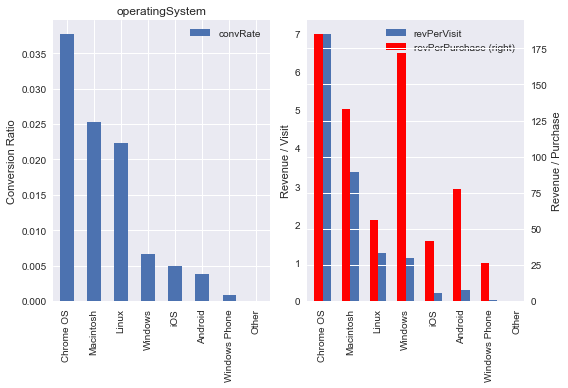

Chi2 Test, chi2: 7194.516, CramersV: 0.089, pval: 0.000


In [64]:
cat_sum = Summarize_categorical(train,'operatingSystem',sort='conversion')

Again 'Chrome OS' has the higest higest conversion rate and the highes revenue per visit, which is not surprising.  'Macintosh' and 'Linux' have comparable conversion rates but their revenue per visit is different by a factor of 2.  Interestingly 'Windows' has a much lower conversion rate, even though 'Edge' and 'Internet Explorer' had a higher conversion rate than 'Safari', Apple's browser.  That leads me to believe this colum offers additional information to the previous `browser` column, but let's check their collinearity with a chi-squared test.

In [65]:
from scipy.stats import chi2_contingency
brows_ops_freq = pd.crosstab(train.browser,train.operatingSystem)
chi2, pval, dof, exp  = chi2_contingency(brows_ops_freq)
print(f'Chi2 test for browser and operatingSystem columns\nchi2: {chi2}, pvalue: {pval}')

Chi2 test for browser and operatingSystem columns
chi2: 934284.2486984982, pvalue: 0.0


Because the p-value of the chi2 test is less than .05 I can reject the null hypothesis that these two columns are correlated.  That is not a surprising result.  Users on the 'Chrome OS' only use 'Chrome' browser, and users of the 'Edge' browser are almost always on 'Windows'. Now how strong is it?

In [66]:
### Cramer's V, how strongly the two categorical columns are correlated. 
cV = np.sqrt(chi2/ (brows_ops_freq.sum().sum() * (min(brows_ops_freq.shape)-1)))
print(f"Cramer's V: {cV:.3f}")

Cramer's V: 0.384


After consulting my reference a Cramer's V of .38 is only a moderate association.  I will keep both of these columns for modelling. 

### isMobile

In [67]:
train.isMobile.value_counts()/train.shape[0]

0    0.735382
1    0.264618
Name: isMobile, dtype: float64

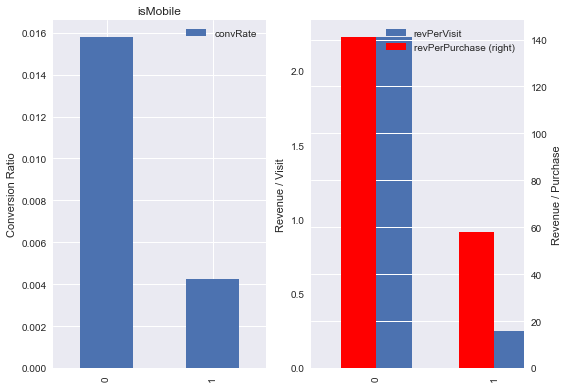

Chi2 Test, chi2: 1856.521, CramersV: 0.045, pval: 0.000


In [68]:
cat_sum = Summarize_categorical(train,'isMobile')

Mobile devices account have a much lower conversion ratio than non-mobile devices and the revenue per visit is much lower too.  I'd expect `isMobile`=1  this to correlate to strongly with certain browsers and operating systems. Let's generate a few plots to see.

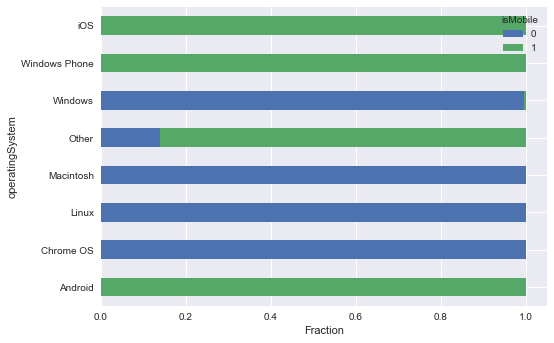

In [69]:
opsys = pd.DataFrame(train[['operatingSystem','isMobile']].value_counts()).reset_index(level=1).pivot(columns='isMobile',values=0)
opsys.div(opsys.sum(axis=1),axis=0).plot(kind='barh',stacked=True)
#opsys.sum(axis=1)
plt.xlabel('Fraction')
plt.show()
del opsys

As I suspected, the categories of operating system are highly correlative to `isMobile`.  Using `isMobile` with `operatingSystem` will be redundant

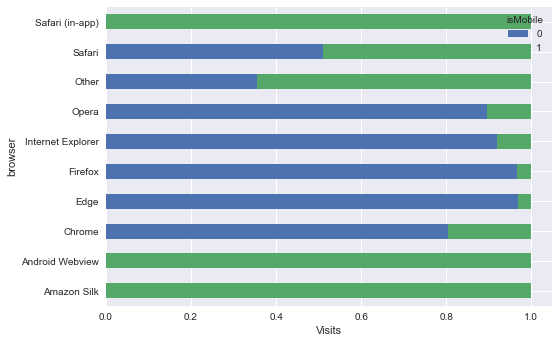

In [70]:
brows = pd.DataFrame(train[['browser','isMobile']].value_counts()).reset_index(level=1).pivot(columns='isMobile',values=0)
brows.div(brows.sum(axis=1),axis=0).plot(kind='barh',stacked=True)
plt.xlabel('Visits')
plt.show()
#train.browser.value_counts().plot(kind='barh')

`Browser` is a little different.  For example, half of 'Safari' users are on mobiles and the other half isn't.  2/3 of the 'Other' category is mobile while only 1/5 of chrome users are.  Using a chi2 test to measure correlation between:

In [71]:
for col in ['browser','operatingSystem']:
    chi2, pval, dof, exp = chi2_contingency(pd.crosstab(train['isMobile'],train[col]))
    cV = np.sqrt(chi2 / (train.shape[0]) * (min(train['isMobile'].nunique(),train[col].nunique()) - 1) ) 
    print(f'isMobile {col}\npvalue: {pval:.3f}\nCramers V: {cV:.3f}')

isMobile browser
pvalue: 0.000
Cramers V: 0.382
isMobile operatingSystem
pvalue: 0.000
Cramers V: 0.993


I can say with confidence that correlation between `isMobile` and `browser` and between `isMobile` and `operatingSystem` are both statistically significant. However `isMobile` is very strongly correlated with `operatingSystem` and only moderately so with `browser`. For modelling I will not use `isMobile` and will use both `browser` and `operatingSystem`.

### deviceCategory

In [72]:
train.deviceCategory.value_counts()

desktop    664479
mobile     208725
tablet      30449
Name: deviceCategory, dtype: int64

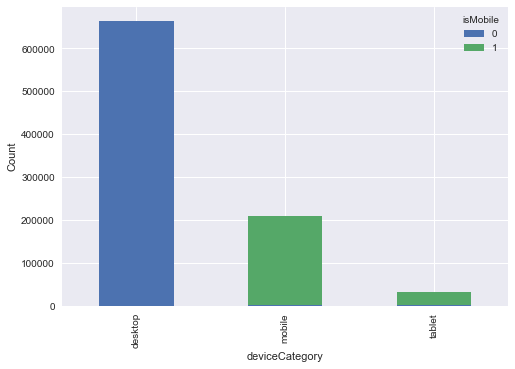

In [73]:
devicecats = pd.DataFrame(train[['deviceCategory','isMobile']].value_counts()).reset_index(level=1).pivot(columns='isMobile',values=0)
devicecats.plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.show()

This column is very correlative to `isMobile` so these are redundant.  It is looking like I can drop `isMobile` without losing any predictive power.  I'll check to see if conversion rates vary across device categories.   

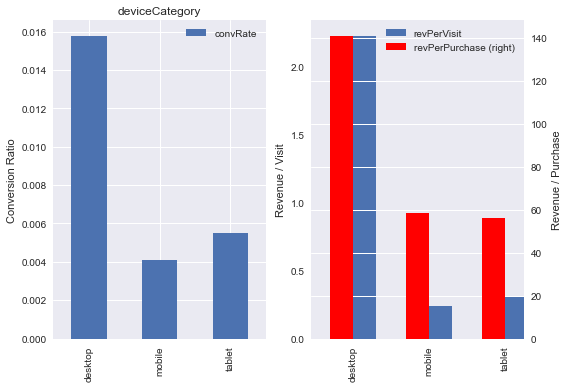

Chi2 Test, chi2: 1862.727, CramersV: 0.045, pval: 0.000


In [74]:
cat_sum = Summarize_categorical(train,'deviceCategory')

The conversion rate for 'mobile' and 'tablet' are similar and both much lower than 'desktop'.  'Mobile' and 'tablet' also tend to be smaller transactions

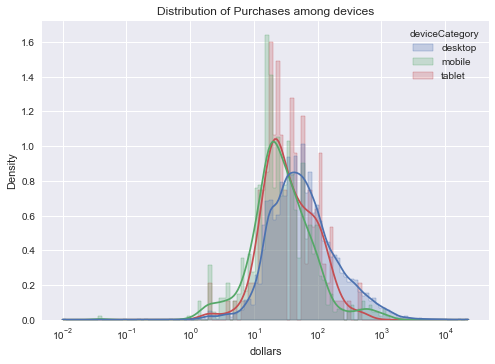

In [75]:
sns.histplot(data=train[train.dollars>0], log_scale=True, x='dollars',hue='deviceCategory',kde=True, stat='density',common_norm=False, element='step')
plt.title('Distribution of Purchases among devices')
plt.show()

The distribution of purchases of 'mobile' and 'tablet' are very similar and the are both lower than 'desktop'.  This confirms that `isMobile` and `deviceCategory` are redundant. I will only need one of them, if I need one of them at all.  They could be highly correlative to other categorical columns `browser` and `operatingSystem`

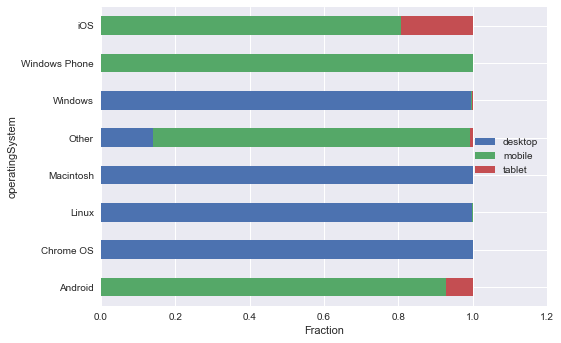

In [76]:
opsys = pd.DataFrame(train[['operatingSystem','deviceCategory']].value_counts()).reset_index(level=1).pivot(columns='deviceCategory',values=0)
opsys.div(opsys.sum(axis=1),axis=0).plot(kind='barh',stacked=True)
#opsys.sum(axis=1)
plt.xlabel('Fraction')
plt.xlim((0,1.2))
plt.legend(loc='right')
plt.show()

del opsys

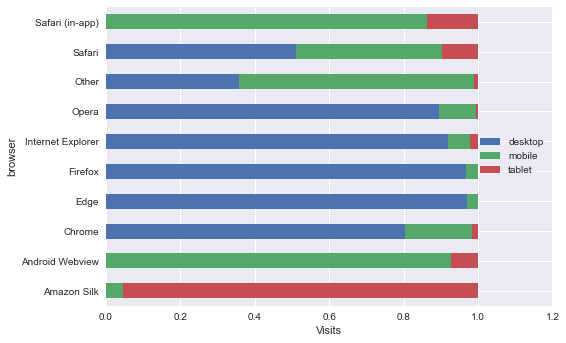

In [77]:
brows = pd.DataFrame(train[['browser','deviceCategory']].value_counts()).reset_index(level=1).pivot(columns='deviceCategory',values=0)
brows.div(brows.sum(axis=1),axis=0).plot(kind='barh',stacked=True)
plt.xlabel('Visits')
plt.xlim((0,1.2))
plt.legend(loc='right')
plt.show()


`deviceCategory` again looks like it is highly correlative to `operatingSystem` and `browser`

In [78]:
colmn = 'deviceCategory'
for col in ['browser','operatingSystem']:
    chi2, pval, dof, exp = chi2_contingency(pd.crosstab(train[colmn],train[col]))
    cV = np.sqrt(chi2 / (train.shape[0]) * (min(train[colmn].nunique(),train[col].nunique()) - 1) ) 
    print(f'{colmn} {col}\npvalue: {pval:.3f}\nCramers V: {cV:.3f}')

deviceCategory browser
pvalue: 0.000
Cramers V: 0.589
deviceCategory operatingSystem
pvalue: 0.000
Cramers V: 1.429


Like `isMobile` before, `deviceCategory` has a statistically significant association to `browser` and `operatingSystem`, with a strong correlation with `operatingSystem` and a moderate correlation with `browser`.  Because of these findings `deviceCategory` will not be used for modelling. 

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903653 entries, 0 to 903652
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   date                903653 non-null  datetime64[ns]
 2   fullVisitorId       903653 non-null  object        
 3   sessionId           903653 non-null  object        
 4   visitId             903653 non-null  int32         
 5   visitNumber         903653 non-null  int64         
 6   visitStartTime      903653 non-null  int64         
 7   browser             903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   isMobile            903653 non-null  int64         
 10  deviceCategory      903653 non-null  object        
 11  continent           903653 non-null  object        
 12  subContinent        903653 non-null  object        
 13  country             903653 no

### continent

In [80]:
train.continent.value_counts()

Americas     450377
Asia         223698
Europe       198311
Oceania       15054
Africa        14745
(not set)      1468
Name: continent, dtype: int64

Looks like I need to split the Americas up.

In [81]:
noam = (train.subContinent == 'Northern America')|(train.subContinent == 'Central America')|(train.subContinent == 'Caribbean') 
        
soam = train.subContinent == 'South America'
train.loc[noam,'continent'] = 'N America'
train.loc[soam,'continent'] = 'S America'

In [82]:
train.continent.value_counts()

N America    408646
Asia         223698
Europe       198311
S America     41731
Oceania       15054
Africa        14745
(not set)      1468
Name: continent, dtype: int64

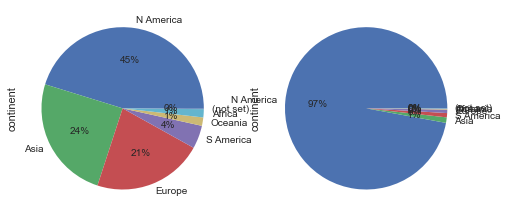

In [83]:
fig,ax = plt.subplots(1,2)
train.continent.value_counts().plot(kind='pie',autopct="%i%%",ax=ax[0])
train[train.dollars>0].continent.value_counts().plot(kind='pie',autopct="%i%%",ax=ax[1])

plt.show()

North Americas accounts for 45% of visitors to the GStore but 97% of purchases.

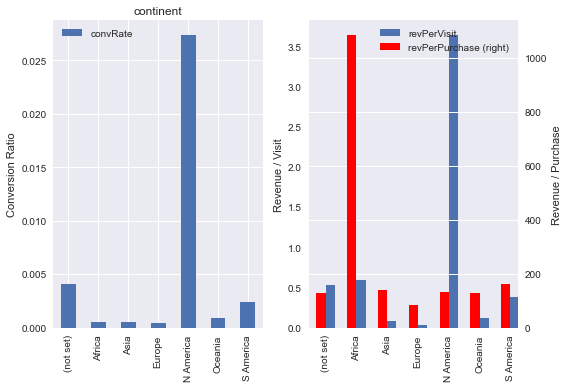

Chi2 Test, chi2: 12701.094, CramersV: 0.119, pval: 0.000


In [84]:
cat_sum = Summarize_categorical(train,'continent')

The conversion rate is much higher in North America than any other continent, and the revenue per visit is also much higher.  Interestingly the revenue per purchase is very high in Africa.  Now moving down one level.


### subContinent

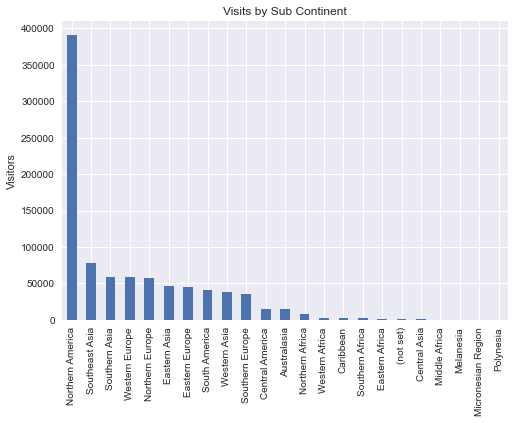

In [85]:
train.subContinent.value_counts().plot(kind='bar')
plt.ylabel('Visitors')
plt.title('Visits by Sub Continent')
plt.show()

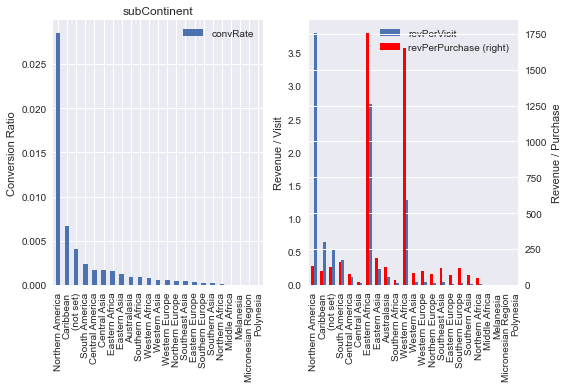

Chi2 Test, chi2: 13646.004, CramersV: 0.123, pval: 0.000


In [86]:
cat_sum = Summarize_categorical(train,'subContinent',sort='conversion')

A quick look at some sub-continents

In [87]:
cat_sum[cat_sum.index.str.contains('Europe')]

convRate  revenue  revPerVisit  revPerPurchase  uniqueUsers  \
Western Europe   0.000507  2842.34     0.048082       94.744667        49184   
Northern Europe  0.000464  1993.88     0.034278       73.847407        48783   
Eastern Europe   0.000309   946.80     0.020924       67.628571        39905   
Southern Europe  0.000224   964.01     0.026943      120.501250        30297   

                 revPerUser  
Western Europe     0.057790  
Northern Europe    0.040872  
Eastern Europe     0.023726  
Southern Europe    0.031819

In [88]:
cat_sum[cat_sum.index.str.contains('Asia')]

convRate   revenue  revPerVisit  revPerPurchase  uniqueUsers  \
Central Asia    0.001646     34.98     0.028790       17.490000         1135   
Eastern Asia    0.001257  11075.22     0.236050      187.715593        37771   
Western Asia    0.000546   1781.04     0.046329       84.811429        34470   
Southeast Asia  0.000411   3755.99     0.048278      117.374687        70391   
Southern Asia   0.000185    754.61     0.012721       68.600909        52704   

                revPerUser  
Central Asia      0.030819  
Eastern Asia      0.293220  
Western Asia      0.051669  
Southeast Asia    0.053359  
Southern Asia     0.014318

I believe there exists enough difference across these continents that this is the highest level of geography that I should use for modelling.  The `continent` column above lumps too many dissimilar `subContinent`s together. Now looking a little deeper into countries.

### country
I will pull in some country level data from the World Bank to supplement the GStore data

In [89]:
train.country.nunique()

222

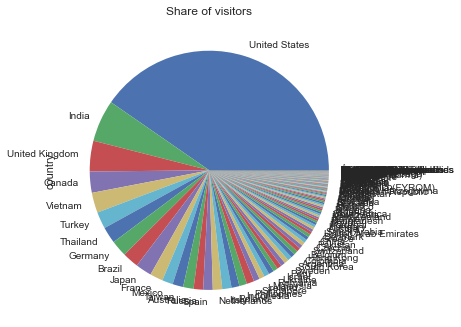

In [90]:
train.country.value_counts().plot(kind='pie')
plt.title('Share of visitors')
plt.show()

There are a lot of unique countries but ~1/3 of visitors come from the United States. I will add country level data from the World Bank and see if it has predictive power.  

Thought for modelling.  I may need to create more than model, 1 for United States, 1 for international users.  

In [91]:
pop = pd.read_csv('Population by country world bank.csv',header=2)[['Country Name','Indicator Name','2017']]
wb_contrs = set(pop['Country Name'].unique())

print( len(set(train.country.unique())-wb_contrs))


51


Hmmm.  51 countries in the GStrore data set are not in the World Bank data. Checking for close matches.

In [92]:
from difflib import SequenceMatcher

for c1 in set(train.country.unique())-wb_contrs:
    for c2 in wb_contrs:
        match = SequenceMatcher(None,c1,c2).ratio()
        if match<1 and match > .7:
            print(c2,c1,match)

British Virgin Islands U.S. Virgin Islands 0.7317073170731707
Cote d'Ivoire Côte d’Ivoire 0.8461538461538461
Zambia Gambia 0.8333333333333334
Gambia, The Gambia 0.7058823529411765
Namibia Gambia 0.7692307692307693
Cambodia Gambia 0.7142857142857143
Slovenia Slovakia 0.75
Serbia Syria 0.7272727272727273
Curacao Curaçao 0.8571428571428571
Iraq Iran 0.75
Ireland Iran 0.7272727272727273
Channel Islands Åland Islands 0.7142857142857143
Cayman Islands Åland Islands 0.7407407407407407
Solomon Islands Åland Islands 0.7142857142857143
Antigua and Barbuda Antigua & Barbuda 0.8888888888888888
Angola Anguilla 0.7142857142857143
Turks and Caicos Islands Turks & Caicos Islands 0.9130434782608695
Sao Tome and Principe São Tomé & Príncipe 0.75
Bosnia and Herzegovina Bosnia & Herzegovina 0.9047619047619048
St. Kitts and Nevis St. Kitts & Nevis 0.8888888888888888
Thailand Taiwan 0.7142857142857143
Bahamas, The Bahamas 0.7368421052631579
Trinidad and Tobago Trinidad & Tobago 0.8888888888888888
Venezuela,

There are a couple matches here.  That I will fix.  Any others that aren't in the world bank will be NAN

In [93]:
### wb:train
mapper={'Iran, Islamic Rep.':'Iran','Bosnia and Herzegovina':'Bosnia & Herzegovina',\
 'Curacao':'Curaçao','Cabo Verde':'Cape Verde','Turks and Caicos Islands':'Turks & Caicos Islands',\
 "Cote d'Ivoire":"Côte d’Ivoire","Gambia, The":"Gambia","Trinidad and Tobago":"Trinidad & Tobago",\
 'Venezuela, RB':'Venezuela','Sao Tome and Principe':'São Tomé & Príncipe',\
 'St. Vincent and the Grenadines':'St. Vincent & Grenadines',\
 'Bahamas, The':'Bahamas','Antigua and Barbuda':'Antigua & Barbuda',\
 'St. Kitts and Nevis':'St. Kitts & Nevis'}
pop['Country Name'] = pop['Country Name'].map(mapper).fillna(pop['Country Name'])

In [94]:
wb_contrs = set(pop['Country Name'].unique())

print( len(set(train.country.unique())-wb_contrs))

37


I fixed some, not sure it was worth the effort but there we go. Now merging to the train data

In [95]:
pop=pop[['Country Name','2017']].rename({'2017':'countryPopulation'},axis=1)

train = train.merge(pop,how='left',left_on='country',right_on='Country Name',validate='m:1')
del pop

Now adding country gdp data

In [96]:

gdp = pd.read_csv('GDP by Country world bank.csv',header=2)[['Country Name','2017']]
gdp['Country Name'] = gdp['Country Name'].map(mapper).fillna(gdp['Country Name'])
#gdp = gdp.rename()
gdp = gdp.rename({'2017':'countryGDP'},axis=1)

train = train.merge(gdp,how='left',left_on='country',right_on='Country Name')


In [97]:
del gdp
train.drop(['Country Name_x','Country Name_y'],axis=1,inplace=True)

And life expectency...

In [98]:
le = pd.read_csv('life expectency by country_world bank.csv',header=2)[['Country Name','2017']]
le['Country Name'] = le['Country Name'].map(mapper).fillna(le['Country Name'])
#gdp = gdp.rename()
le = le.rename({'2017':'countryLE'},axis=1)

train = train.merge(le,how='left',left_on='country',right_on='Country Name')


Finally the percent of the population who are internet users...

In [99]:
iu = pd.read_csv('PercentInternetUsers World Bank.csv',header=2)[['Country Name','2017']]
iu['Country Name'] = iu['Country Name'].map(mapper).fillna(iu['Country Name'])
#gdp = gdp.rename()
iu = iu.rename({'2017':'countryPIU'},axis=1)

train = train.merge(iu,how='left',left_on='country',right_on='Country Name')

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903653 entries, 0 to 903652
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   date                903653 non-null  datetime64[ns]
 2   fullVisitorId       903653 non-null  object        
 3   sessionId           903653 non-null  object        
 4   visitId             903653 non-null  int32         
 5   visitNumber         903653 non-null  int64         
 6   visitStartTime      903653 non-null  int64         
 7   browser             903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   isMobile            903653 non-null  int64         
 10  deviceCategory      903653 non-null  object        
 11  continent           903653 non-null  object        
 12  subContinent        903653 non-null  object        
 13  country             903653 no

In [101]:
del le, iu
train.drop(['Country Name_x','Country Name_y'],axis=1,inplace=True)

There are missing values for some countries.  I fill them in with the median from each's subcontinent.

In [102]:
countries = train.groupby('country')[['subContinent','countryGDP','countryLE','countryPopulation','countryPIU']].max()
train = train.merge(countries.groupby('subContinent').median(),how='left',left_on='subContinent',right_on='subContinent',suffixes=['','_med'])

for c in ['countryGDP','countryLE','countryPopulation', 'countryPIU']:
    train[c] = train[c].fillna(train[c+'_med'])
    train.drop(c+'_med',axis=1,inplace=True)
    

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903653 entries, 0 to 903652
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   date                903653 non-null  datetime64[ns]
 2   fullVisitorId       903653 non-null  object        
 3   sessionId           903653 non-null  object        
 4   visitId             903653 non-null  int32         
 5   visitNumber         903653 non-null  int64         
 6   visitStartTime      903653 non-null  int64         
 7   browser             903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   isMobile            903653 non-null  int64         
 10  deviceCategory      903653 non-null  object        
 11  continent           903653 non-null  object        
 12  subContinent        903653 non-null  object        
 13  country             903653 no

There are still a small number of nulls in the column, after replacing the nans with `subContinent` medians.

In [104]:
train[(train.countryGDP.isna()) & (train.dollars>0)].T

115305  \
channelGrouping                             Direct   
date                           2016-08-24 00:00:00   
fullVisitorId                  8919336618754256169   
sessionId           8919336618754256169_1472076890   
visitId                                 1472076890   
visitNumber                                      2   
visitStartTime                          1472076890   
browser                                     Chrome   
operatingSystem                            Android   
isMobile                                         1   
deviceCategory                              tablet   
continent                                (not set)   
subContinent                             (not set)   
country                                  (not set)   
region                                    New York   
metro                                  New York NY   
city                                      New York   
networkDomain                                co.nz   
campaign                                 (not set)   
source                                    (direct)   
medium                                      (none)   
keyword                                        NaN   
visits                                           1   
hits                                            13   
pageviews                                       11   
bounces                                          0   
newVisits                                        0   
transactionRevenue                       132730000   
dollars                                     132.73   
purchase                                         1   
dateTime                       2016-08-24 22:14:50   
hour                                            22   
weekend                                          0   
month                                            8   
time                                     22.372222   
timeDiffLastVisit                         177962.0   
countryPopulation                              NaN   
countryGDP                                     NaN   
countryLE                                      NaN   
countryPIU                                     NaN   

                                            181527  \
channelGrouping                     Organic Search   
date                           2016-08-19 00:00:00   
fullVisitorId                  3514808551180416782   
sessionId           3514808551180416782_1471628052   
visitId                                 1471628052   
visitNumber                                      2   
visitStartTime                          1471628052   
browser                                     Chrome   
operatingSystem                            Windows   
isMobile                                         0   
deviceCategory                             desktop   
continent                                (not set)   
subContinent                             (not set)   
country                                  (not set)   
region                                   (not set)   
metro                                    (not set)   
city                                     (not set)   
networkDomain                         leaseweb.com   
campaign                                 (not set)   
source                                      google   
medium                                     organic   
keyword                             (not provided)   
visits                                           1   
hits                                            56   
pageviews                                       44   
bounces                                          0   
newVisits                                        0   
transactionRevenue                       128210000   
dollars                                     128.21   
purchase                                         1   
dateTime                       2016-08-19 17:34:12   
hour                                            17   
weekend                                        

In [105]:
train[train.countryGDP.isna()].head().T

310   \
channelGrouping                          Referral   
date                          2016-09-02 00:00:00   
fullVisitorId                  149633083723377298   
sessionId           149633083723377298_1472819179   
visitId                                1472819179   
visitNumber                                     1   
visitStartTime                         1472819179   
browser                                    Chrome   
operatingSystem                           Windows   
isMobile                                        0   
deviceCategory                            desktop   
continent                               (not set)   
subContinent                            (not set)   
country                                 (not set)   
region                                  (not set)   
metro                                   (not set)   
city                                    (not set)   
networkDomain                           (not set)   
campaign                                (not set)   
source                       analytics.google.com   
medium                                   referral   
keyword                                       NaN   
visits                                          1   
hits                                            2   
pageviews                                       2   
bounces                                         0   
newVisits                                       1   
transactionRevenue                              0   
dollars                                       0.0   
purchase                                        0   
dateTime                      2016-09-02 12:26:19   
hour                                           12   
weekend                                         0   
month                                           9   
time                                    12.486111   
timeDiffLastVisit                             NaN   
countryPopulation                             NaN   
countryGDP                                    NaN   
countryLE                                     NaN   
countryPIU                                    NaN   

                                              1312  \
channelGrouping                             Social   
date                           2016-09-02 00:00:00   
fullVisitorId                  0983912688516501789   
sessionId           0983912688516501789_1472833208   
visitId                                 1472833208   
visitNumber                                      1   
visitStartTime                          1472833208   
browser                                      Other   
operatingSystem                              Other   
isMobile                                         1   
deviceCategory                              mobile   
continent                                (not set)   
subContinent                             (not set)   
country                                  (not set)   
region                                   (not set)   
metro                                    (not set)   
city                                     (not set)   
networkDomain                       opera-mini.net   
campaign                                 (not set)   
source                                 youtube.com   
medium                                    referral   
keyword                                        NaN   
visits                                           1   
hits                                             3   
pageviews                                        3   
bounces                                          0   
newVisits                                        1   
transactionRevenue                               0   
dollars                                        0.0   
purchase                                         0   
dateTime                       2016-09-02 16:20:08   
hour                                            16   
weekend                                          0   
month                              

There is a small fraction of records with no geographical data and of those there are very small number of purchases.  I will drop all of these with missing geographical info. 

In [106]:
train = train[train.continent!='(not set)']

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902185 entries, 0 to 903652
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     902185 non-null  object        
 1   date                902185 non-null  datetime64[ns]
 2   fullVisitorId       902185 non-null  object        
 3   sessionId           902185 non-null  object        
 4   visitId             902185 non-null  int32         
 5   visitNumber         902185 non-null  int64         
 6   visitStartTime      902185 non-null  int64         
 7   browser             902185 non-null  object        
 8   operatingSystem     902185 non-null  object        
 9   isMobile            902185 non-null  int64         
 10  deviceCategory      902185 non-null  object        
 11  continent           902185 non-null  object        
 12  subContinent        902185 non-null  object        
 13  country             902185 no

Do these country wide statistics correlate to the whether a purchase was made or the size of the purchase? Checking with Pearsons r

In [108]:
for col in ['countryGDP','countryLE','countryPopulation','countryPIU']:
    r,pval = pearsonr(train.loc[:,'dollars'],train.loc[:,col])
    print(f'{col} r: {r:.3f}, p-value: {pval:.3f}')

countryGDP r: 0.035, p-value: 0.000
countryLE r: 0.005, p-value: 0.000
countryPopulation r: 0.006, p-value: 0.000
countryPIU r: 0.018, p-value: 0.000


All of the above variables have a p-value of less than .05 meaning that there is evidence of association with them and the size of the purchase. Country GDP and % of population that use the internet have the highest correlation with the purchase size, but the magnitude of the correlation is very small.  Now checking collinearity.

In [109]:
from itertools import product
cols = ['countryGDP','countryLE','countryPopulation','countryPIU']

country = train.groupby('country')[cols].max()

cols = list(product(cols,cols))
cols = [(x,y) for x,y in cols if x!=y]
cols
for c1, c2 in cols:
    r,pval = pearsonr(country[c1],country[c2])
    print(f'{c1} vs {c2}, r: {r:.3f}, p-value: {pval:.3f}')
del country

countryGDP vs countryLE, r: 0.168, p-value: 0.012
countryGDP vs countryPopulation, r: 0.563, p-value: 0.000
countryGDP vs countryPIU, r: 0.122, p-value: 0.070
countryLE vs countryGDP, r: 0.168, p-value: 0.012
countryLE vs countryPopulation, r: -0.010, p-value: 0.880
countryLE vs countryPIU, r: 0.815, p-value: 0.000
countryPopulation vs countryGDP, r: 0.563, p-value: 0.000
countryPopulation vs countryLE, r: -0.010, p-value: 0.880
countryPopulation vs countryPIU, r: -0.104, p-value: 0.122
countryPIU vs countryGDP, r: 0.122, p-value: 0.070
countryPIU vs countryLE, r: 0.815, p-value: 0.000
countryPIU vs countryPopulation, r: -0.104, p-value: 0.122


Takeaways:
- GDP is weakly associated with Life expectency
- GDP is moderately associated with Population
- Population is not associated with life expectency
- PIU is strongly associated with LE, but (surprisingly) not GDP

It looks like all three of these variables have some predictive power for predicting whether there is a purchase.  Seeing as how there is not a strong Pearson correlation between any of these variables I will keep all for now and will check with VIF later. 
___
Some plots...

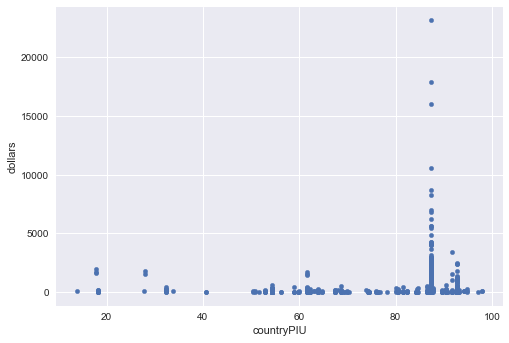

In [110]:
train[train.purchase==1].plot(kind='scatter',x='countryPIU',y='dollars');

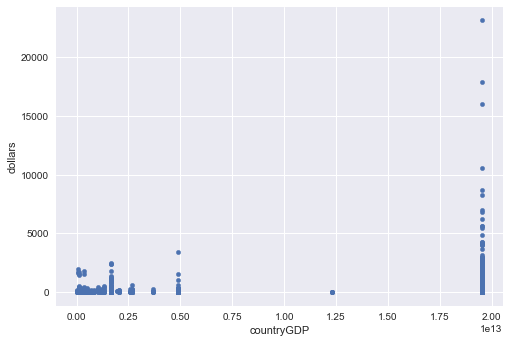

In [111]:
train[train.purchase==1].plot(kind='scatter',x='countryGDP',y='dollars');

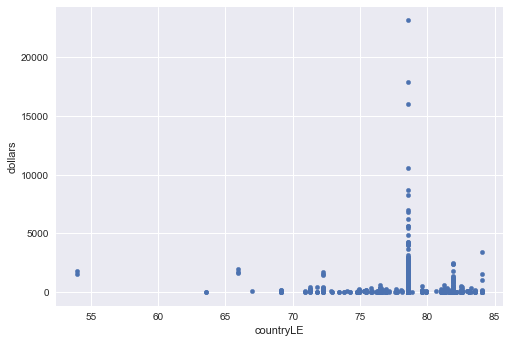

In [112]:
train[train.purchase==1].plot(kind='scatter',x='countryLE',y='dollars');

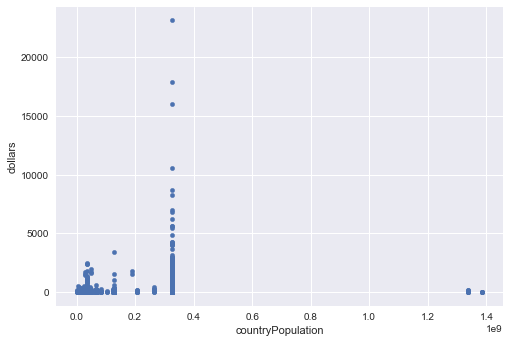

In [113]:
train[train.purchase==1].plot(kind='scatter',x='countryPopulation',y='dollars');

The line of points is the United States.  It might be dominating or skewing the relationship here

### region

In [114]:
train.region.value_counts()/train.shape[0]

not available in demo dataset    0.563311
California                       0.119149
New York                         0.029297
(not set)                        0.029245
England                          0.014629
                                   ...   
Maha Sarakham                    0.000007
Baja California                  0.000007
San Salvador Department          0.000006
Kumamoto Prefecture              0.000006
Montana                          0.000003
Name: region, Length: 376, dtype: float64

More than half of the `region` column is null.  Quick summary.

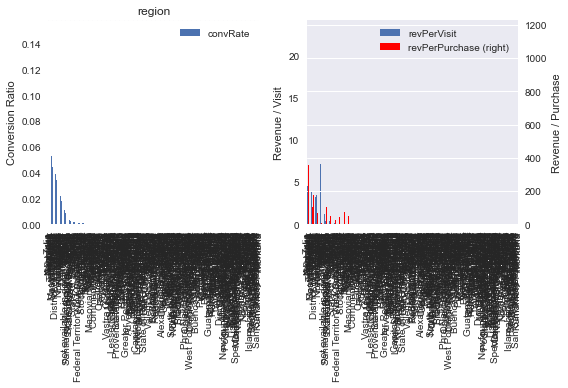

Chi2 Test, chi2: 13823.485, CramersV: 0.124, pval: 0.000


In [115]:
cat_sum = Summarize_categorical(train,'region',sort='conversion')

In [116]:
[i for i in cat_sum.index if i.startswith('New')]

['New York',
 'New Jersey',
 'New Taipei City',
 'New South Wales',
 'Newfoundland and Labrador']

In [117]:
states="""Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,
Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,
Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,
Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,
North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,
South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,
Wisconsin,Wyoming"""
states = states.replace('\n','').split(',')
print(len(states))


50


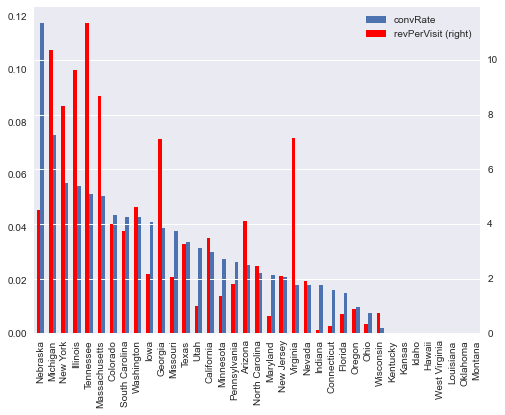

In [118]:
fig,ax = plt.subplots(figsize=(8,6))
width=.3
cat_sum[cat_sum.index.isin(states)].plot(kind='bar',y='convRate',ax=ax,\
                                        position=0,width=width)
cat_sum[cat_sum.index.isin(states)].plot(kind='bar',y='revPerVisit',\
                                         ax=ax,secondary_y=True,color='red',\
                                        position=1,width = width)
plt.show()


The conversion ratio varies a lot across U.S. states as does the revenue per visit. It looks like I need to include this in the modelling somehow.  Maybe in a binary encoded column 51 categories.  One for each state and one for non-US. I'll create that now.

In [119]:
train['state'] = 'NotUS'
train.loc[train.region.isin(states),'state'] = train.region

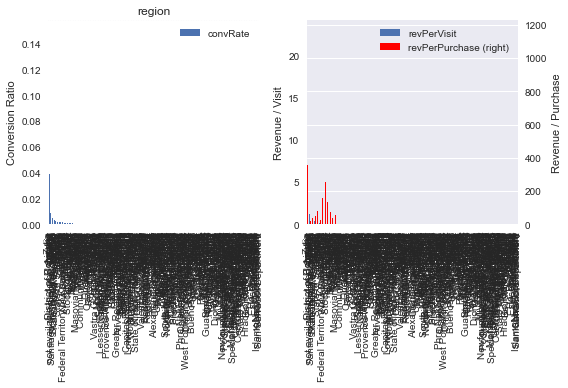

Chi2 Test, chi2: 2625.278, CramersV: 0.060, pval: 0.000


In [120]:
### removing US states from above
cat_sum = Summarize_categorical(train[train.region.isin(states)==False],'region',sort='conversion')

Even though the vast majoritiy of `region` values are not avaliable, but it does include U.S. States.  Right now I think useful final geographical features are `subContinent`, `state`, and the country level metrics I previously joined to the data.

### metro

In [121]:
train.metro.value_counts()/train.shape[0]

not available in demo dataset        0.563311
(not set)                            0.222038
San Francisco-Oakland-San Jose CA    0.106311
New York NY                          0.029833
London                               0.013934
                                       ...   
Rochester-Mason City-Austin,IA       0.000007
Chattanooga TN                       0.000007
Tallahassee FL-Thomasville GA        0.000007
Boise ID                             0.000003
Butte-Bozeman MT                     0.000003
Name: metro, Length: 94, dtype: float64

In [122]:
train.loc[train.country!='United States','metro'].unique()

array(['(not set)', 'not available in demo dataset', 'London',
       'San Francisco-Oakland-San Jose CA', 'Seattle-Tacoma WA',
       'New York NY', 'Meridian (exc. Channel Islands)', 'Midlands',
       'North West', 'Roanoke-Lynchburg VA', 'Atlanta GA', 'JP_KANTO',
       'Central Scotland', 'Los Angeles CA', 'Chicago IL', 'San Diego CA',
       'North Scotland', 'Houston TX', 'Austin TX', 'Yorkshire',
       'Miami-Ft. Lauderdale FL', 'Dallas-Ft. Worth TX', 'Detroit MI',
       'JP_KINKI', 'Boston MA-Manchester NH',
       'Washington DC (Hagerstown MD)', 'HTV Wales', 'HTV West',
       'Pittsburgh PA', 'Denver CO', 'JP_OTHER'], dtype=object)

`metro` is largely missing from the dataset with almost ~80% of the data unavailable or not set, and almost all of the metro areas are from the United States.

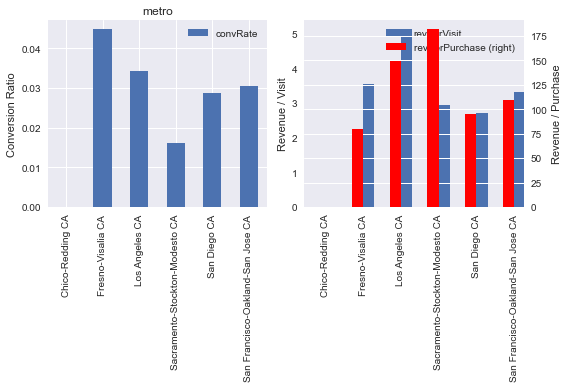

Chi2 Test, chi2: 8.672, CramersV: 0.009, pval: 0.123


In [123]:
cat_sum = Summarize_categorical(train[train.region=='California'],'metro')

Checking a couple of metro's to see if there is a wide range of conversion ratios in metro areas.

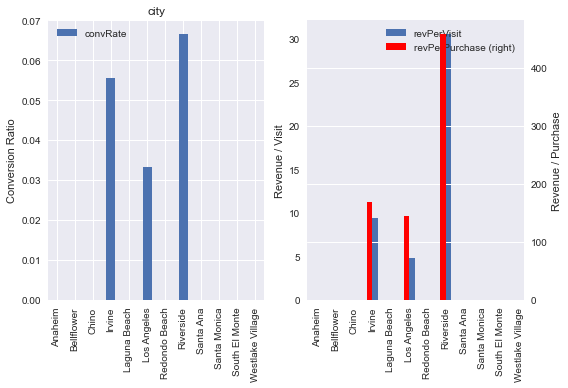

Chi2 Test, chi2: 26.363, CramersV: 0.051, pval: 0.006


In [124]:
cat_sum = Summarize_categorical(train[train.metro=='Los Angeles CA'],'city')

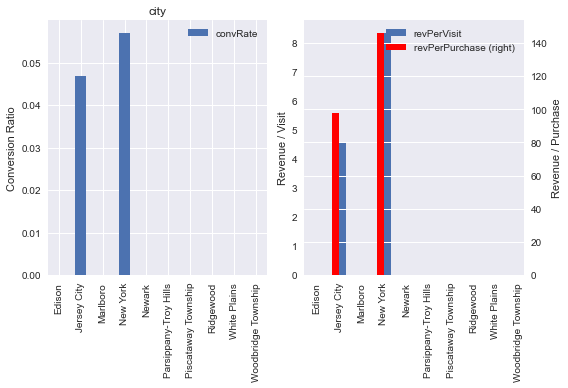

Chi2 Test, chi2: 18.006, CramersV: 0.026, pval: 0.035


In [125]:
cat_sum = Summarize_categorical(train[train.metro=='New York NY'],'city')

It looks like there is too much variation inside different metro areas to be useful.  Moving on.

### city

In [126]:
train.city.value_counts()

not available in demo dataset    508211
Mountain View                     40884
(not set)                         32820
New York                          26369
San Francisco                     20328
                                  ...  
San Salvador                          5
Kumamoto                              5
Daly City                             4
Bozeman                               3
Boise                                 3
Name: city, Length: 649, dtype: int64

In [127]:
print(train.loc[train.country=='United States','city'].nunique())
print(train.loc[train.country!='United States','city'].nunique())

256
494


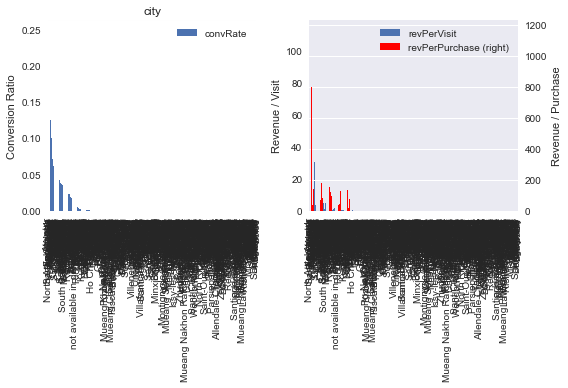

Chi2 Test, chi2: 15254.037, CramersV: 0.130, pval: 0.000


In [128]:
cat_sum = Summarize_categorical(train,'city',sort='conversion')

`city` is mostly not available, and approximately 1/3 of them are from the United States.  would be useful if for example the conversion ratio varies a lot across California.  Let's see


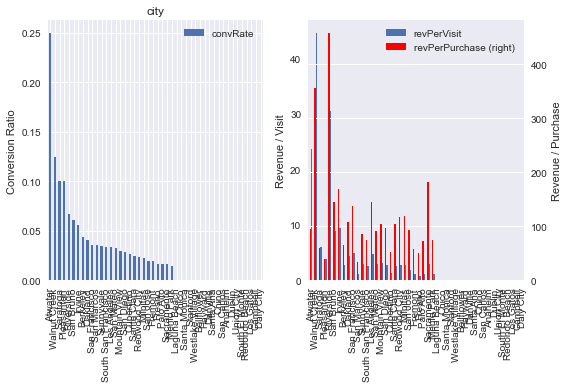

Chi2 Test, chi2: 213.441, CramersV: 0.045, pval: 0.000


In [129]:
cat_sum = Summarize_categorical(train[train.region=='California'],'city',sort='conversion')

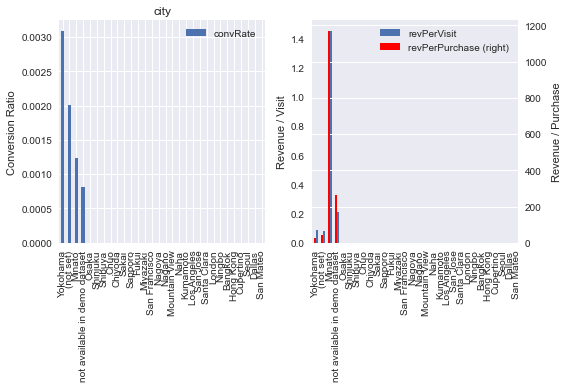

Chi2 Test, chi2: 4.617, CramersV: 0.015, pval: 1.000


In [130]:
cat_sum = Summarize_categorical(train[train.country=='Japan'],'city',sort='conversion')

The conversion rate and revenue per purchase varies quite a bit across the cities of California and Japan. This column looks useful for prediction, but there are a lot of unique categories.  How should I encode them? Binary encoding or maybe create a column with every cities conversion ratios and revenue per purchase?

In [131]:
### For binary encoding
np.log2(train.city.nunique())

9.342074667999139

Label encoding will help with interpretability which will help the Google marketing team make future decisions, but I need to decrease the number of columns.  To start I will group all citys who have 0 purchase revenue into one group 

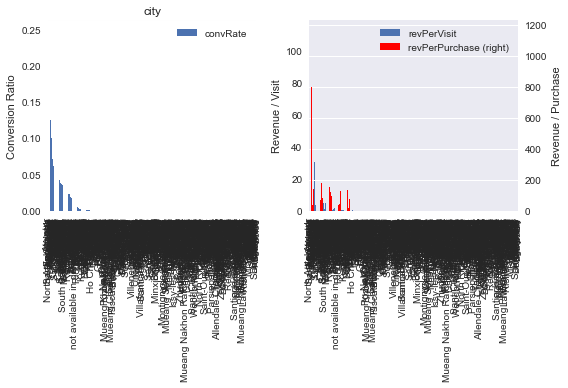

Chi2 Test, chi2: 15254.037, CramersV: 0.130, pval: 0.000


In [132]:
cat_sum = Summarize_categorical(train,'city',sort='conversion')

In [133]:
cat_sum.describe()

convRate        revenue  revPerVisit  revPerPurchase    uniqueUsers  \
count  134.000000     649.000000   649.000000      134.000000     649.000000   
mean     0.033763    2371.805023     1.044955      118.174773    1110.627119   
std      0.043082   27817.222032     6.246844      141.757377   16785.538413   
min      0.000183       0.000000     0.000000        1.500000       3.000000   
25%      0.001807       0.000000     0.000000       44.336250       8.000000   
50%      0.022883       0.000000     0.000000       84.339121      24.000000   
75%      0.044899       0.000000     0.000000      140.428782     136.000000   
max      0.250000  646161.110000   113.508571     1168.616667  425319.000000   

       revPerUser  
count  649.000000  
mean     1.334108  
std      7.114771  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max    113.508571

In [134]:
zero_rev_cities = list(cat_sum[cat_sum['revenue']==0].index)
print(len(zero_rev_cities))

515


In [135]:
mapper = {k:'noPurchaseCity' for k in zero_rev_cities}
mapper['not available in demo dataset'] = 'not available'
mapper['(not set)'] = 'not available'

In [136]:
train['city'] = train['city'].map(mapper).fillna(train['city'])
train.city.nunique()

134

### networkDomain

In [137]:
train.networkDomain.value_counts()/train.shape[0]

(not set)          0.271063
unknown.unknown    0.161452
comcast.net        0.031859
rr.com             0.016435
verizon.net        0.015116
                     ...   
museums.ca         0.000001
881903.com         0.000001
codecspat.ro       0.000001
vtcrc.net          0.000001
svklaw.com         0.000001
Name: networkDomain, Length: 28023, dtype: float64

There are 28,000 differnet domains and 27% of them are null.  A lot of that information should be captured in the geographical columns above

In [138]:
xtab = pd.crosstab(train.loc[train['state']!='NotUS','state'],train.loc[train['state']!='NotUS','networkDomain'])
chi2, pval, dof, exp = chi2_contingency(xtab)
cV = np.sqrt(chi2/ (xtab.sum().sum() * (min(xtab.shape)-1)))
print(f'US state and networkDomain\npvalue: {pval:.3f}, Cramers V: {cV:.3f}')

US state and networkDomain
pvalue: 0.000, Cramers V: 0.454


In [139]:
xtab = pd.crosstab(train.loc[train['state']=='NotUS','country'],train.loc[train['state']=='NotUS','networkDomain'])
chi2, pval, dof, exp = chi2_contingency(xtab)
cV = np.sqrt(chi2/ (xtab.sum().sum() * (min(xtab.shape)-1)))
print(f'Not US country and networkDomain\npvalue: {pval:.3f}, Cramers V: {cV:.3f}')

Not US country and networkDomain
pvalue: 0.000, Cramers V: 0.707


In the US there is a moderate correlation to `networkDomain` and outside the US there is a very strong correlation to `networkDomain`.  Because this and that 27% are nulls I will drop this column.  

In [140]:
train.drop('networkDomain',axis=1,inplace=True)

### campaign
advertising campaign?

In [141]:
train.campaign.value_counts()

(not set)                                          863923
Data Share Promo                                    16372
AW - Dynamic Search Ads Whole Site                  14235
AW - Accessories                                     7066
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: campaign, dtype: int64

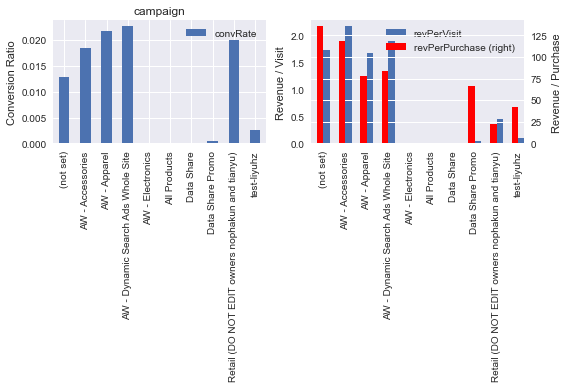

Chi2 Test, chi2: 328.203, CramersV: 0.019, pval: 0.000


In [142]:
cat_sum = Summarize_categorical(train,'campaign')

There is a big difference in conversion rate and revenue per visit across the different campaigns.

In [143]:
camps = pd.DataFrame(train[train.dollars>0]['campaign'].value_counts()).join(train.campaign.value_counts(),how='outer',rsuffix='_tot')
camps = camps.rename(columns={'campaign':'purchases','campaign_tot':'visitors'})
camps = camps.fillna(0)
camps['purchaseProbability'] = camps.purchases/camps.visitors
camps
#train.campaign.value_counts().sort_index()
#train[train.dollars>0]['campaign'].value_counts().sort_index() / train.campaign.value_counts().sort_index()

purchases  visitors  \
(not set)                                          11044.0    863923   
AW - Accessories                                     130.0      7066   
AW - Apparel                                           1.0        46   
AW - Dynamic Search Ads Whole Site                   323.0     14235   
AW - Electronics                                       0.0        96   
All Products                                           0.0         4   
Data Share                                             0.0         1   
Data Share Promo                                       9.0     16372   
Retail (DO NOT EDIT owners nophakun and tianyu)        1.0        50   
test-liyuhz                                            1.0       392   

                                                 purchaseProbability  
(not set)                                                   0.012784  
AW - Accessories                                            0.018398  
AW - Apparel                                                0.021739  
AW - Dynamic Search Ads Whole Site                          0.022691  
AW - Electronics                                            0.000000  
All Products                                                0.000000  
Data Share                                                  0.000000  
Data Share Promo                                            0.000550  
Retail (DO NOT EDIT owners nophakun and tianyu)             0.020000  
test-liyuhz                                                 0.002551

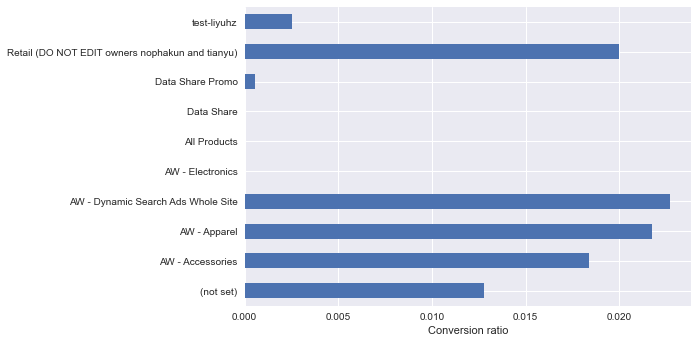

In [144]:
camps.purchaseProbability.plot(kind='barh')
plt.xlabel('Conversion ratio')
plt.show()

It looks like there are a few different campaigns that greatly increased conversio ratio. I'll do a quick statistical test to make sure this is the case.  

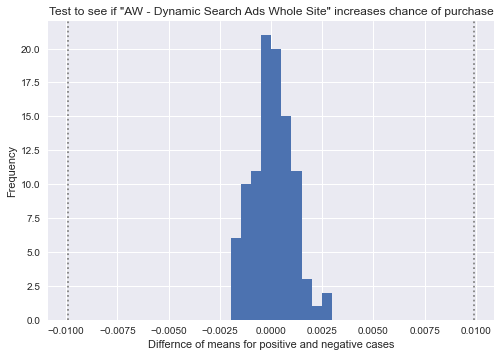

p-value: 0.0


In [145]:
means=[]
campaign2test='AW - Dynamic Search Ads Whole Site'
#campaign2test='AW - Accessories'

camps = pd.DataFrame(train[train.dollars>0]['campaign'].value_counts()).join(train.campaign.value_counts(),how='outer',rsuffix='_tot')
camps = camps.rename(columns={'campaign':'purchases','campaign_tot':'visitors'})
camps = camps.fillna(0)
camps['purchaseProbability'] = camps.purchases/camps.visitors
camps



for _ in range(100):
    train['Perm'] = np.random.permutation(train.campaign)
    camp = train[(train.dollars>0) & (train.Perm==campaign2test)].shape[0] / train[train.Perm==campaign2test].shape[0]
    notset = train[(train.dollars>0) & (train.Perm=='(not set)')].shape[0] / train[train.Perm=='(not set)'].shape[0]
    means.append(camp-notset)
    #print(camp,notset,camp-notset)
means=np.array(means)

diff = camps.loc[campaign2test,'purchaseProbability']-camps.loc['(not set)','purchaseProbability']
#diff = abs(.022691-.012784)

p=(np.sum(means >= diff)+np.sum(means<=diff*-1))/len(means)

train.drop('Perm',axis=1,inplace=True)
plt.hist(means)
plt.axvline(diff,c='grey',linestyle=':')
plt.axvline(diff*-1,c='grey',linestyle=':')
plt.xlabel('Differnce of means for positive and negative cases')
plt.ylabel('Frequency')
plt.title(f'Test to see if "{campaign2test}" increases chance of purchase')
plt.show()
print('p-value: {}'.format(p))

After conducting a permutation test. There is an almost 0% chance that the observed difference in purchase probability between the ad campaings "AW - Dynamic Search Ads Whole Site" and "AW - Accessories"  and the rest of the data is the same.  I can conclude that the ad's do make a significant difference to the purchase probability.  

Quick test to see if there is a strong correlation to `channelGrouping`

In [146]:
xtab=pd.crosstab(train.channelGrouping, train.campaign)
chi2, pval, dof, exp = chi2_contingency(xtab)
cV = np.sqrt(chi2/ (xtab.sum().sum() * (min(xtab.shape)-1)))
print(f'channelGrouping and campaign\npvalue: {pval:.3f}, Cramers V: {cV:.3f}')

channelGrouping and campaign
pvalue: 0.000, Cramers V: 0.516


As I suspected there is a moderate association between these two columns.  Checking multicollinearity will take care of this later. 

### source

In [147]:
train.source.nunique()

380

In [148]:
pd.DataFrame(train.source.value_counts()).head(20)

source
google                   400251
youtube.com              212166
(direct)                 142711
mall.googleplex.com       66412
Partners                  16380
analytics.google.com      16155
dfa                        5686
google.com                 4663
m.facebook.com             3362
baidu                      3277
sites.google.com           2983
facebook.com               2295
siliconvalley.about.com    2095
reddit.com                 2021
qiita.com                  1810
quora.com                  1541
bing                       1529
t.co                       1528
yahoo                      1478
mail.google.com            1457

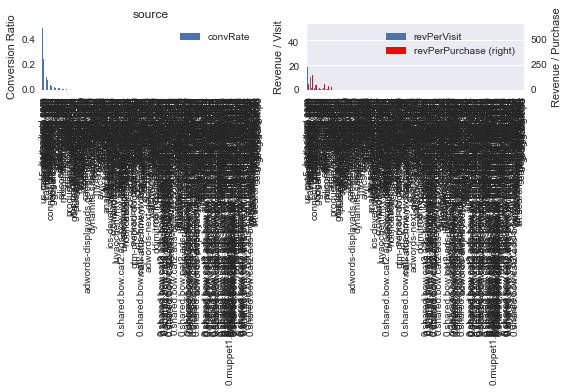

Chi2 Test, chi2: 25940.730, CramersV: 0.170, pval: 0.000


In [149]:
cat_sum = Summarize_categorical(train,'source',sort='conversion')

Tough to learn anything from this. 

In [150]:
print('Number of sources with no purchases',cat_sum[cat_sum.convRate.isna()].shape[0])


Number of sources with no purchases 336


There are 336 (out of 380) sources with no purchases.  I will lump all of these into a new category

In [151]:
no_purch = list(cat_sum[cat_sum.convRate.isna()].index)

train['source2'] = train.source
train.loc[train.source.isin(no_purch),'source2'] = 'LumpedNoConversion'

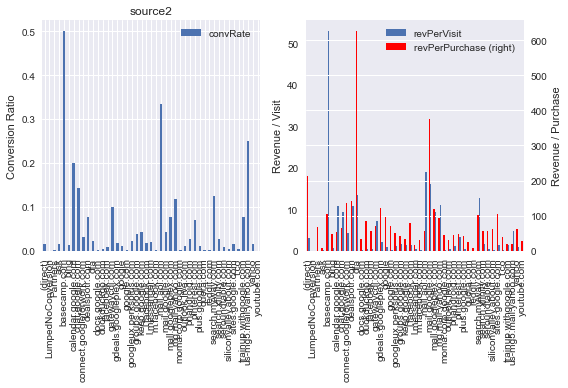

Chi2 Test, chi2: 25940.730, CramersV: 0.170, pval: 0.000


In [152]:
cat_sum = Summarize_categorical(train,'source2')

In [153]:
print(cat_sum.shape)


(45, 6)


Now there are 45 unique categories and the conversion rate varies a lot but the revenue per visit doesn't quite as much.  I may end up reducing the unique categories later on by binning on the conversion rate, but I will keep this column as is for now. 

In [154]:
train['source'] = train.source2
train.drop('source2',axis=1,inplace=True)

### medium

In [155]:
train.medium.value_counts()

organic      380961
referral     330454
(none)       142709
cpc           25307
affiliate     16372
cpm            6262
(not set)       120
Name: medium, dtype: int64

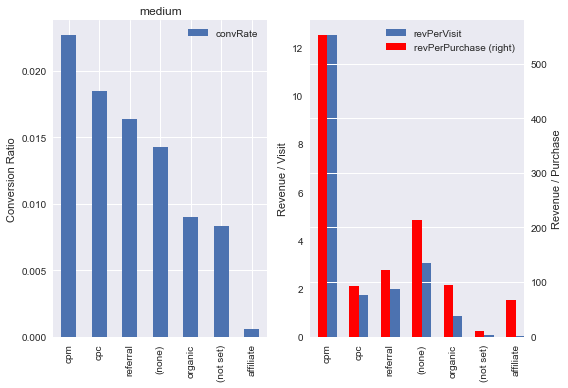

Chi2 Test, chi2: 1105.183, CramersV: 0.035, pval: 0.000


In [156]:
cat_sum = Summarize_categorical(train,'medium',sort='conversion')

The conversion ratio varies across the 7 categories.  The revenue per visit is high for 'cpm' and very low for '(not set)' and 'affiliate'.  
___
This variable and it's columns look useful for prediction as is.  

In [157]:
xtab = pd.crosstab(train.loc[:,'medium'],train.loc[:,'channelGrouping'])
chi2, pval, dof, exp = chi2_contingency(xtab)
cV = np.sqrt(chi2/ (xtab.sum().sum() * (min(xtab.shape)-1)))
print(f'medium and channelGrouping\npvalue: {pval:.3f}, Cramers V: {cV:.3f}')

medium and channelGrouping
pvalue: 0.000, Cramers V: 1.000


In [158]:
xtab

channelGrouping  (Other)  Affiliates  Direct  Display  Organic Search  \
medium                                                                  
(none)                 0           0  142709        0               0   
(not set)            120           0       0        0               0   
affiliate              0       16372       0        0               0   
cpc                    0           0       0        0               0   
cpm                    0           0       0     6262               0   
organic                0           0       0        0          380961   
referral               0           0       0        0               0   

channelGrouping  Paid Search  Referral  Social  
medium                                          
(none)                     0         0       0  
(not set)                  0         0       0  
affiliate                  0         0       0  
cpc                    25307         0       0  
cpm                        0         0       0  
organic                    0         0       0  
referral                   0    104790  225664

`medium` is effectively the same thing as `channelGrouping` except 2 of `channelGroupings` categories are lumped into 1 of `mediums`

I will drop `medium` now.

In [159]:
train.drop('medium',axis=1,inplace=True)

### keyword

In [160]:
train.keyword.isna().sum()/train.shape[0]

0.5564357642833787

In [161]:
train.keyword.nunique()

3650

The `keyword` column is mostly null, and there are 3,650 unique searches (which is probably too many to encode directly).  2 Questions now:
- Are people who searched to get to the GStore more likely to make a purchase?
- Are there certain keywords that have a higher conversion ratio?

In [162]:
print('Null keyword',train[train.keyword.isna() & (train.dollars>0)].shape[0] / train[train.keyword.isna()].shape[0])
print('Keyword',train[(train.keyword.isna()==False) & (train.dollars>0)].shape[0] / train[train.keyword.isna()==False].shape[0])

Null keyword 0.015222864974263358
Keyword 0.009663224023369658


`keyword` nulls actually have a higher conversion rate than those with some keyword search.

In [163]:
keyword_set = train[train.keyword.isna()==False]
print(keyword_set['source'].value_counts())


google                396675
bing                    1526
yahoo                   1476
ask                      270
LumpedNoConversion       220
Partners                   8
dfa                        2
Name: source, dtype: int64


`keyword` is not null when the `source` is some kind of search engine (google, bing, yahoo etc.). 

In [164]:
### Find unique searches that resulted in a purchase
import re

keywords = pd.DataFrame(train.keyword.value_counts())
keywords = keywords.rename(columns={'keyword':'Count'})
keywords = keywords.join(train[train.dollars>0]['keyword'].value_counts())
keywords['convRate'] = keywords.keyword / keywords.Count
parenth_search = re.findall("\(\D{2,33}\)",' '.join(list(keywords.index)))

no_purchase = keywords.rename(columns = {'keyword':'Purchase'})[keywords.keyword.isna()]
purch_keywords = keywords.rename(columns = {'keyword':'Purchase'}).dropna()

print(purch_keywords.shape)
no_purchase_keywords = list(no_purchase.index)
conv_keywords = list(purch_keywords.index)
purch_keywords.sort_values('convRate',ascending=False)


(35, 3)


Count  Purchase  convRate
you tube trucker cap google merchandise       1       1.0  1.000000
google men's hoodie pullover                  1       1.0  1.000000
+google +coffee +mug                          1       1.0  1.000000
Youtube merchandise store                     2       1.0  0.500000
GOOGLE MERCHANDISE                            5       2.0  0.400000
google apparel store                          7       2.0  0.285714
google items for sale                         5       1.0  0.200000
googlesupport                                 6       1.0  0.166667
+Google +Gear                                27       3.0  0.111111
googlemerchandisestore                       12       1.0  0.083333
category_l1==166                             36       2.0  0.055556
youtube merchandise store                    21       1.0  0.047619
+Google +Swag                                65       3.0  0.046154
+google+tshirts                              24       1.0  0.041667
google stickers                              49       2.0  0.040816
google store merchandise                     62       2.0  0.032258
google shirt                                 31       1.0  0.032258
Google Merchandise                         1647      45.0  0.027322
google merchandise store                   2207      59.0  0.026733
1hZbAqLCbjwfgOH7                           2263      56.0  0.024746
6qEhsCssdK0z36ri                          11495     261.0  0.022706
+Google +Merchandise                        352       7.0  0.019886
+google +merch                               60       1.0  0.016667
1X4Me6ZKNV0zg-jV                            467       6.0  0.012848
+google +stores                              99       1.0  0.010101
(not provided)                           365873    3383.0  0.009246
youtube merch                               247       2.0  0.008097
+google +merchandise +store                 258       2.0  0.007752
+google +store                              377       2.0  0.005305
google merch                                209       1.0  0.004785
google merchandise                          238       1.0  0.004202
YouTube Merchandise                         253       1.0  0.003953
(Remarketing/Content targeting)            2294       9.0  0.003923
google store                               1271       3.0  0.002360
(automatic matching)                        427       1.0  0.002342

There are 35 unique `keyword` searches that account for all of the purchases.  At a glance, a lot of these searches include the strings 'google' and 'merch'.  Now I'll check the searches that didn't result in a purchase

There appear to be a few special keywords in the data that are enclosed in parenthesis.  I extracted them above, let's take a look.


In [165]:
keywords[keywords.index.isin(parenth_search)]

Count  keyword  convRate
(not provided)                   365873   3383.0  0.009246
(Remarketing/Content targeting)    2294      9.0  0.003923
(User vertical targeting)           488      NaN       NaN
(automatic matching)                427      1.0  0.002342
(content targeting)                 298      NaN       NaN

Now take a look at keywords that did not result in a purchase.

In [166]:
no_purchase.sort_values('Count',ascending=False).head(30)

Count  Purchase  convRate
youtube                                               565       NaN       NaN
(User vertical targeting)                             488       NaN       NaN
(content targeting)                                   298       NaN       NaN
Youtube                                               165       NaN       NaN
+Google +Products                                     148       NaN       NaN
https://www.googlemerchandisestore.com/               135       NaN       NaN
google shop                                           133       NaN       NaN
Arts & Entertainment                                  126       NaN       NaN
google online store                                   108       NaN       NaN
youtube t shirt                                       107       NaN       NaN
+youtube +merch                                       102       NaN       NaN
+YouTube +Merchandise                                 102       NaN       NaN
google t shirt                                        101       NaN       NaN
youtube store                                          98       NaN       NaN
youtube shop                                           84       NaN       NaN
YouTube                                                70       NaN       NaN
you tube                                               69       NaN       NaN
+google +store +merchandise                            64       NaN       NaN
You tube                                               55       NaN       NaN
https://www.googlemerchandisestore.com/shop.axd...     54       NaN       NaN
Google Merchandise Store                               50       NaN       NaN
+google +backpack                                      49       NaN       NaN
bag                                                    45       NaN       NaN
youtube merchandise                                    43       NaN       NaN
merchandise                                            38       NaN       NaN
Google store                                           36       NaN       NaN
googlestore                                            31       NaN       NaN
google商店官网                                             29       NaN       NaN
YOUTUBE                                                28       NaN       NaN
Google Online Store                                    27       NaN       NaN

At a glance, a lot of the searches that didn't result in a purchase include the string `youtube`.  Now to visualize I will make some word clouds of each.

Purchase


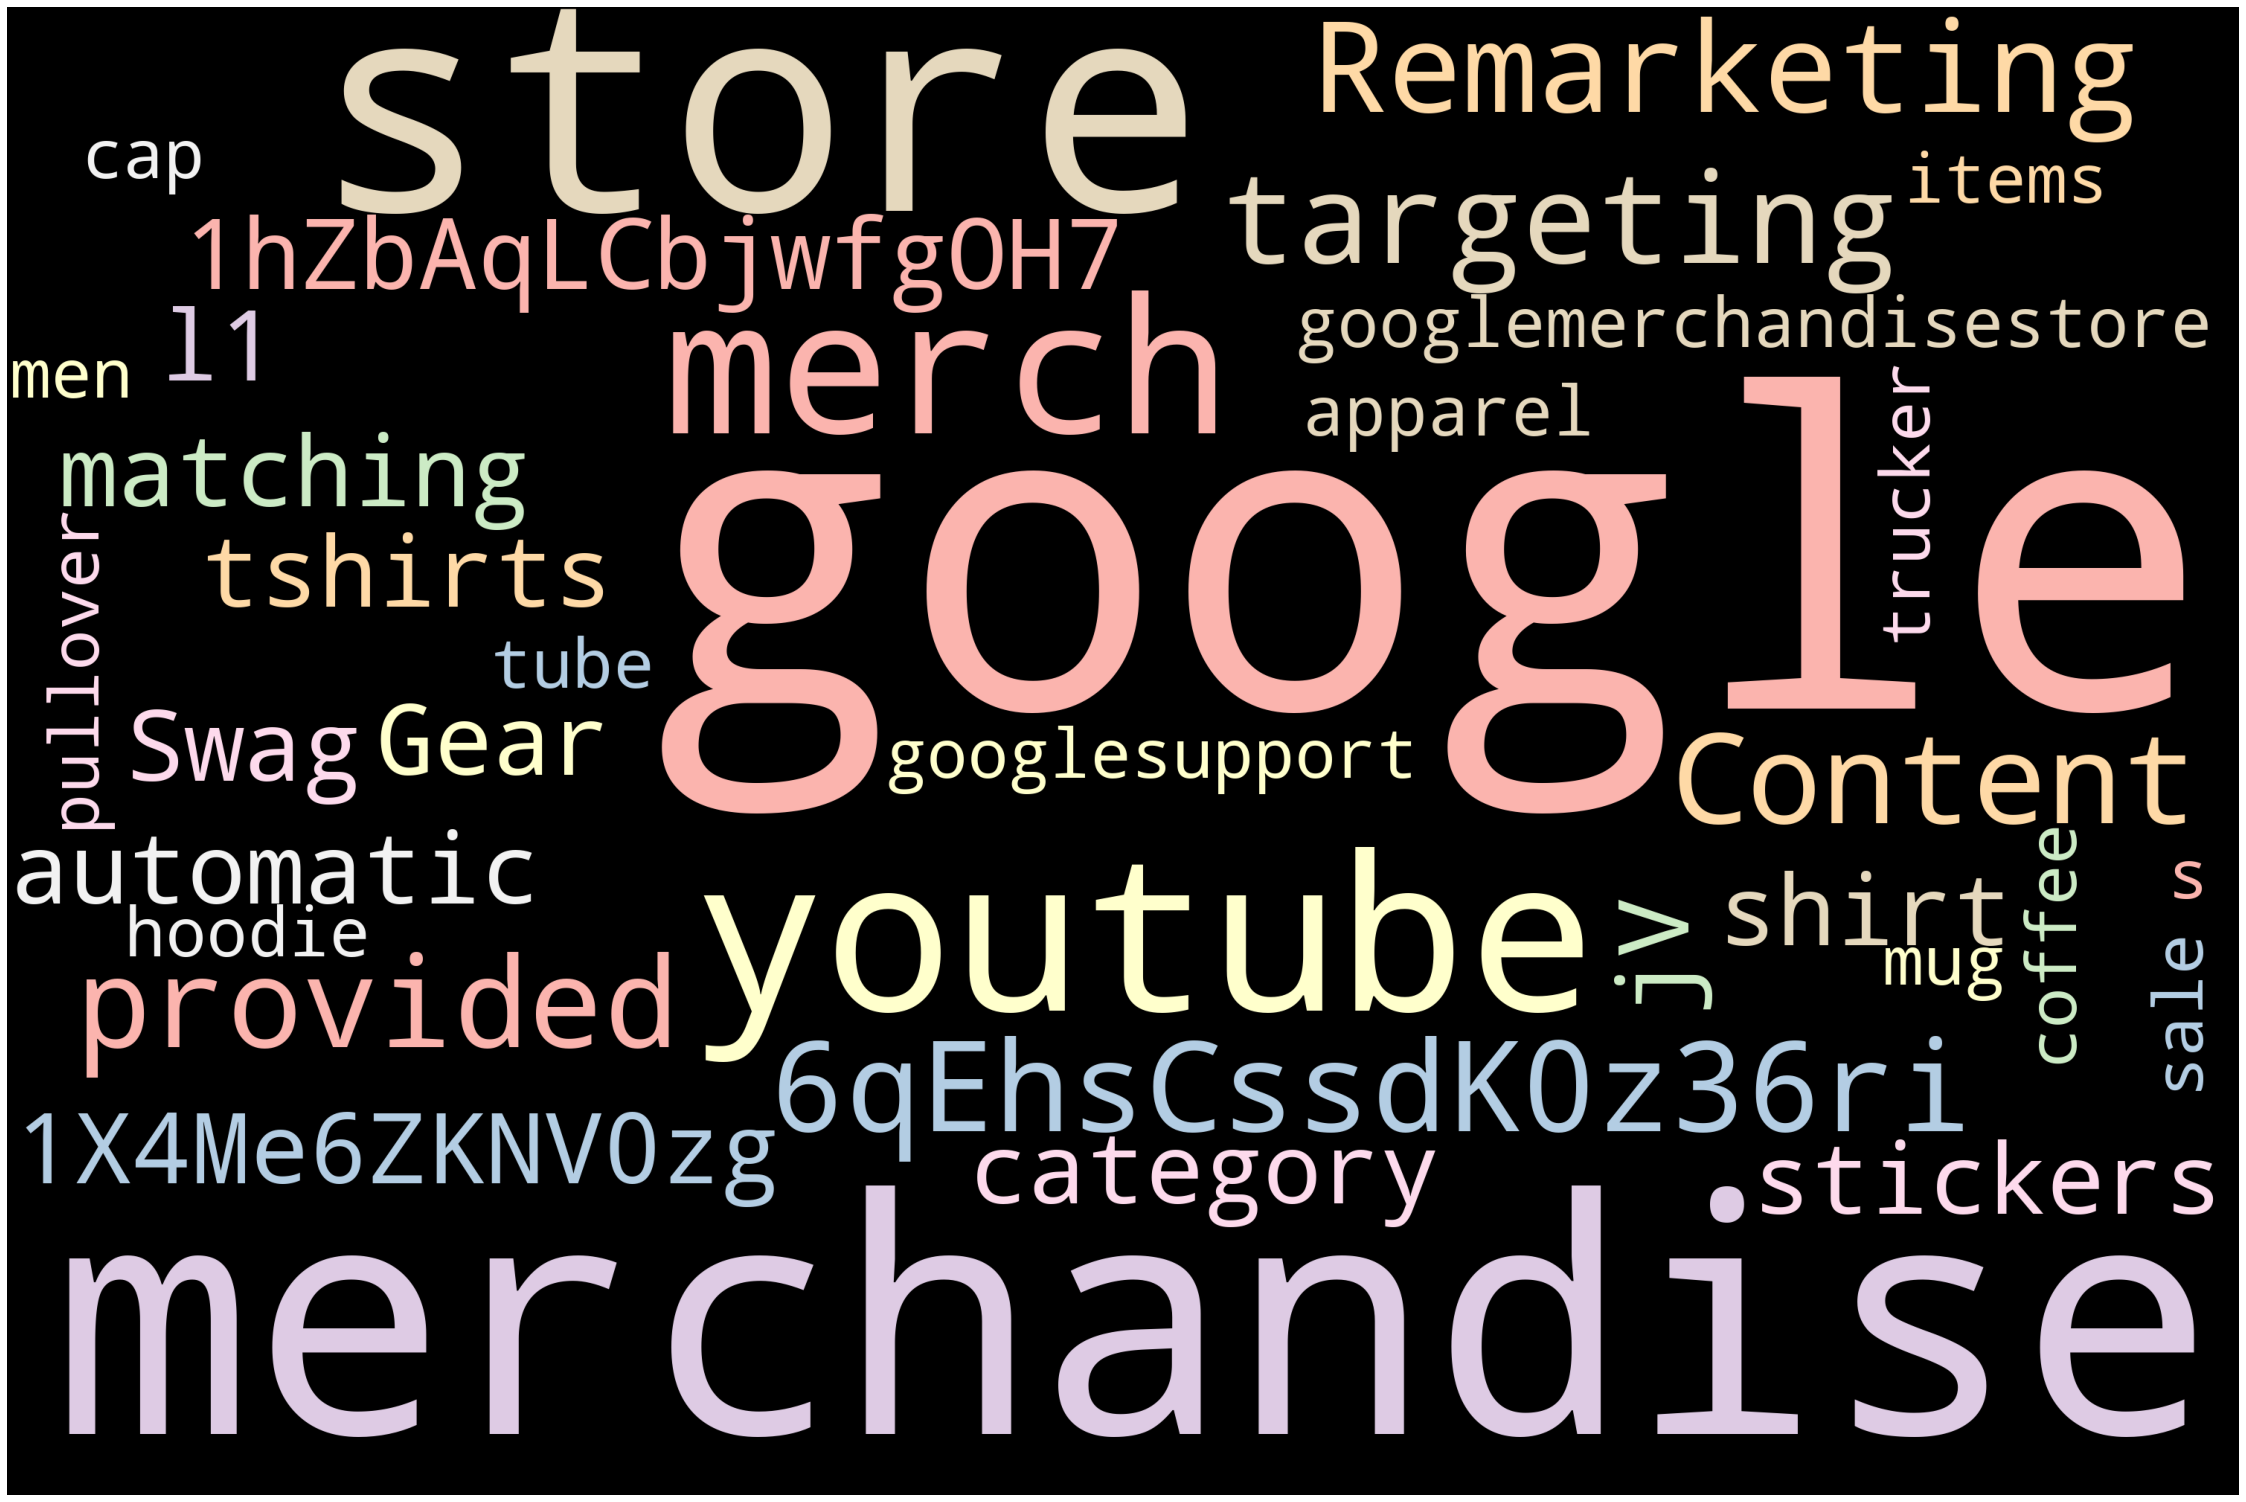

No Purchase


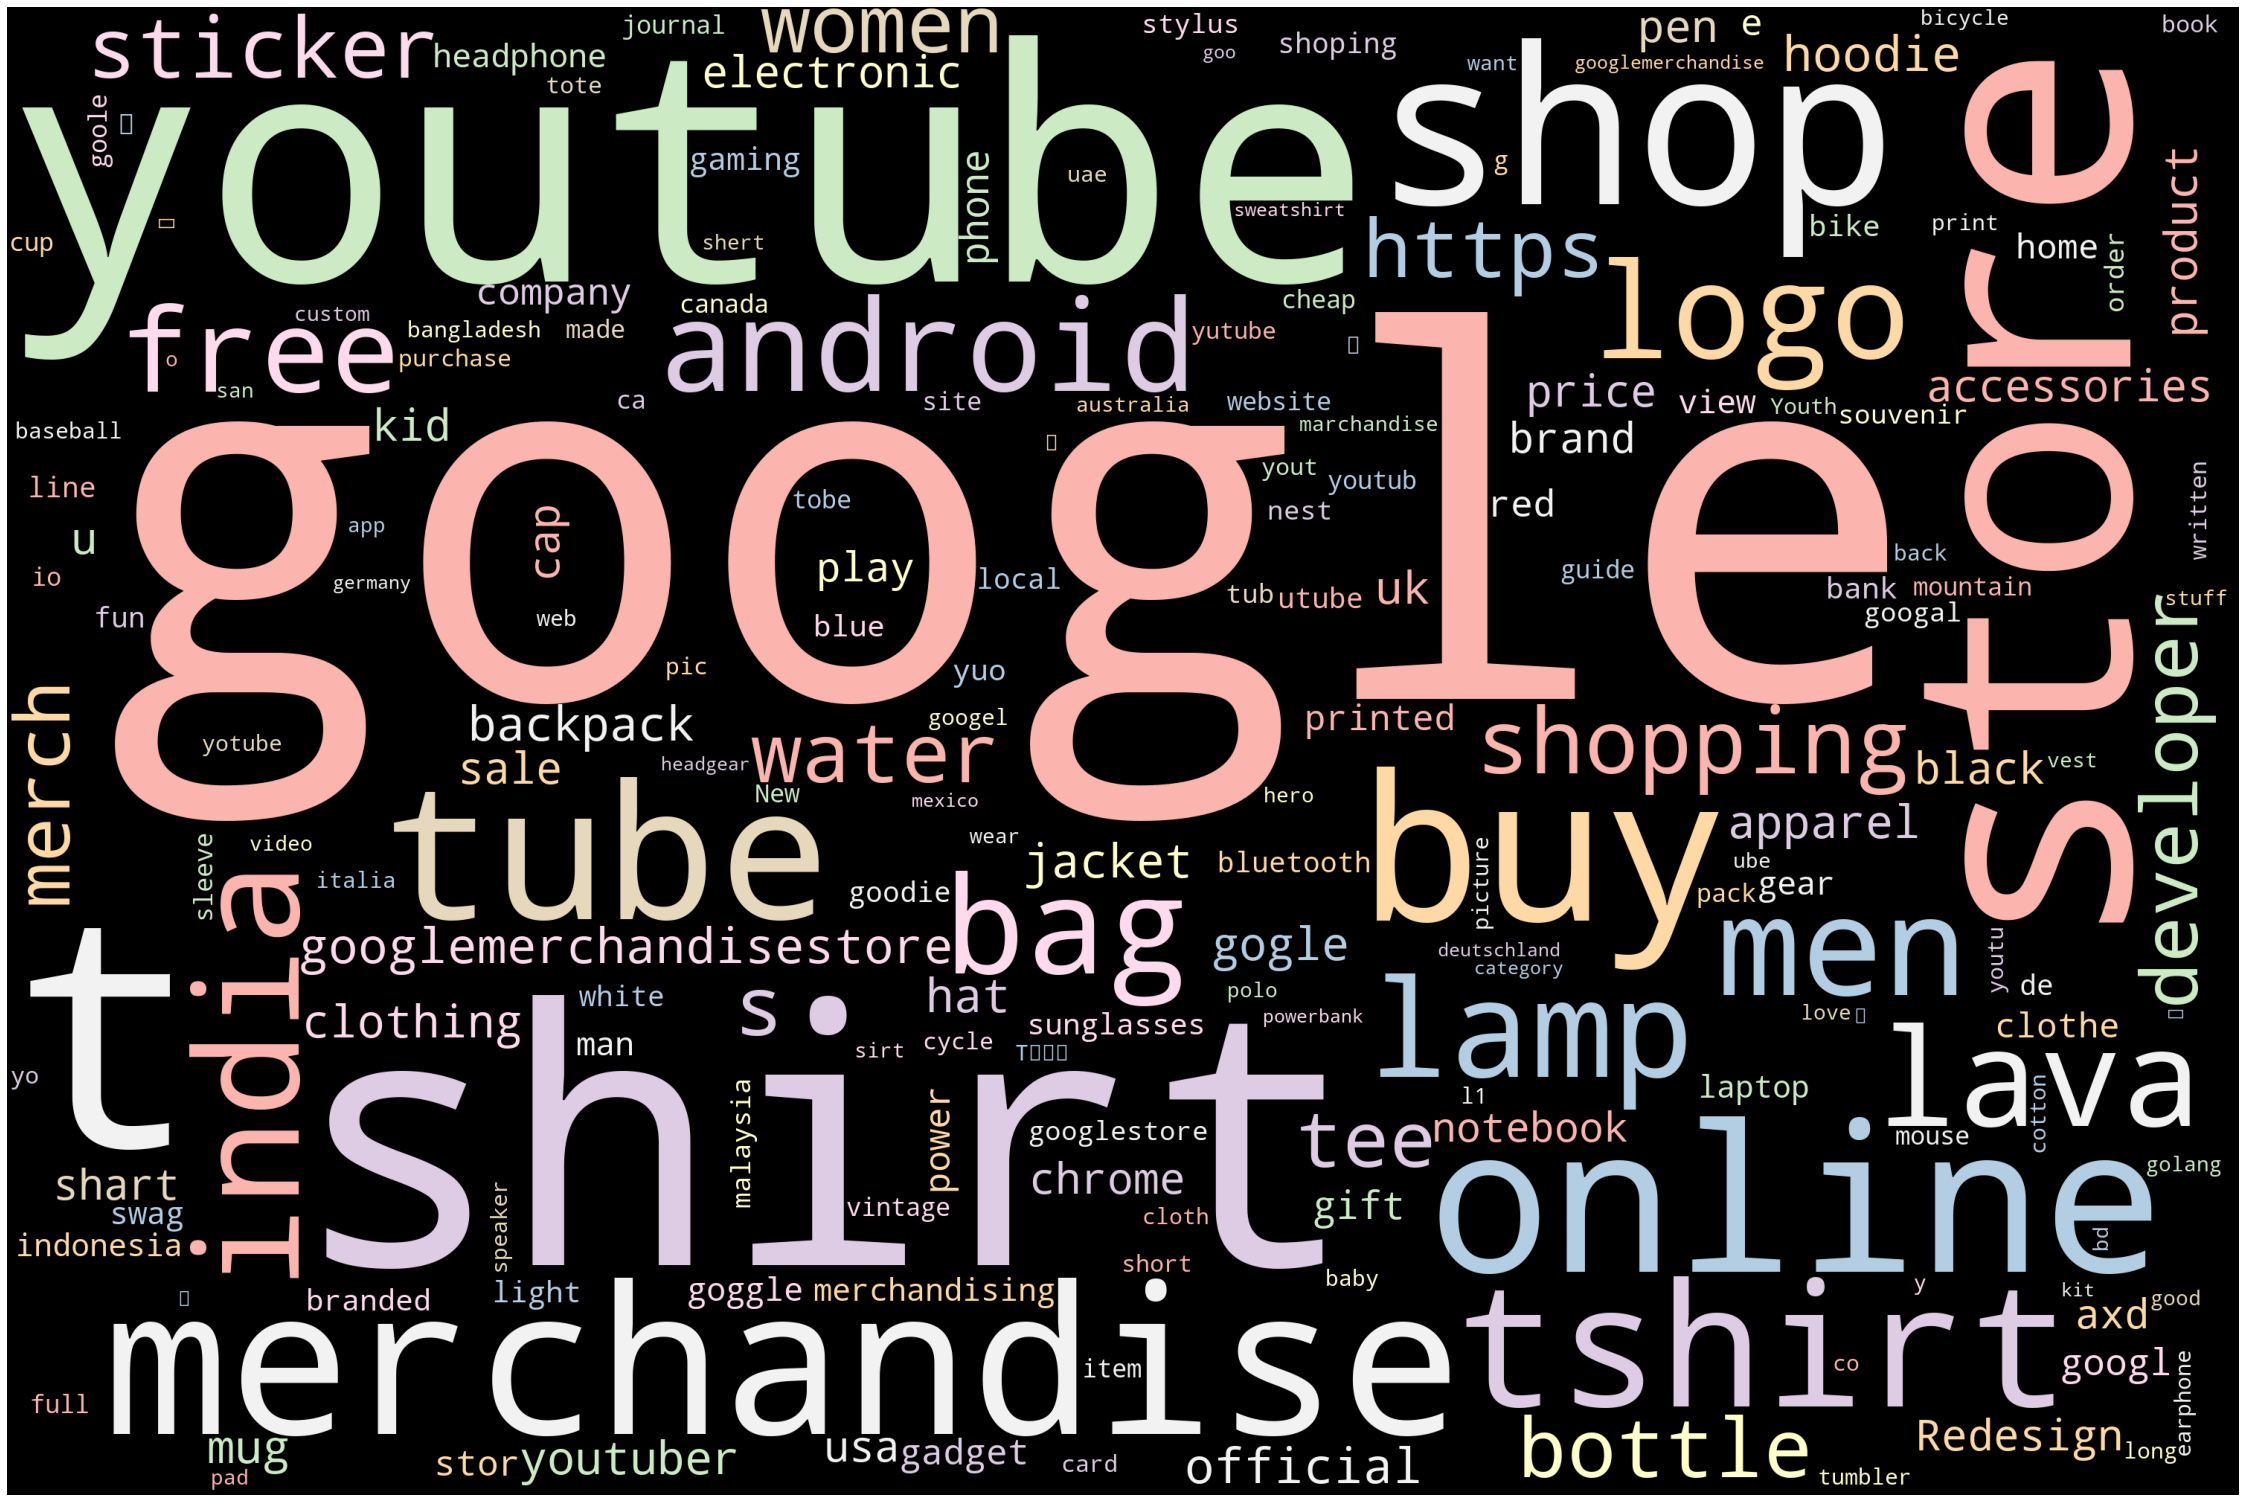

In [167]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    #plt.title('Purchase')
    plt.show();
    
from wordcloud import WordCloud, STOPWORDS
import re

for lst,title in zip([conv_keywords,no_purchase_keywords],['Purchase','No Purchase']):
    agg = []
    for k in lst:
        dum = re.split(',| |_|\+|\W',k)
        for d in dum:
            agg.append(d)
    agg = ' '.join(agg) 
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,\
                          background_color='black', colormap='Pastel1',\
                          collocations=False, stopwords = STOPWORDS).generate(agg)
    print(title)
    plot_cloud(wordcloud)
    

Problem! A lot of the same words show up frequently in searches that resulted in purchases and searches that did not, like 'youtube', 'google', 'store', 'merchandise'.  

I will try creating new binary columns for some search terms and see if they have any predictive power.

In [168]:
key_words = ['store','merch','shirt','google','youtube','shop','apparel']
for k in key_words:
    train['keyword'+k.capitalize()] = (1 * train.keyword.str.lower().str.contains(k))
    train['keyword'+k.capitalize()] = train['keyword'+k.capitalize()].fillna(0)

train['keyword2'] = train.keyword
train.loc[train.keyword.isin(parenth_search)==False,'keyword2'] = 'search'
train = pd.get_dummies(train,columns=['keyword2'],prefix='keyword')

Now a quick attempt at modelling to see if those new columns have any predictive power for purchases.

Features:keywordStore, keywordMerch, keywordShirt, keywordGoogle, keywordYoutube, keywordShop, keywordApparel, keyword_(not provided), keyword_(Remarketing/Content targeting), keyword_(User vertical targeting), keyword_(automatic matching), keyword_(content targeting), keyword_search


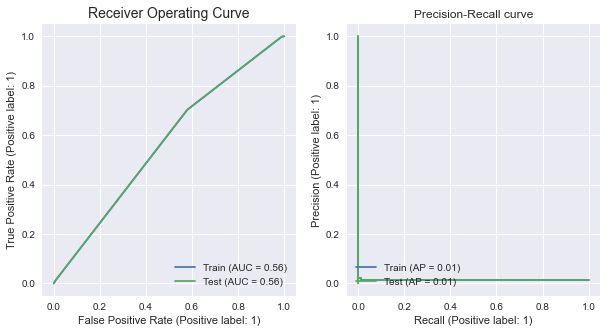

In [169]:
X_cols = ['keyword'+k.capitalize() for k in ['store','merch','shirt','google','youtube','shop','apparel']]
X_cols += ['keyword_'+p for p in parenth_search[:-1]+['search']]

print('Features:'+', '.join(X_cols))

X=train.loc[:,X_cols].to_numpy()
y=train.loc[:,'purchase'].to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y)



logr = LogisticRegression(class_weight='balanced')
logr.fit(X_train,y_train)

fig,ax = plt.subplots(1,2,figsize=(10,5))
plot_roc_curve(logr,X_train,y_train,name='Train',ax=ax[0])
plot_roc_curve(logr,X_test,y_test,name='Test',ax=ax[0])
ax[0].set_title('Receiver Operating Curve',fontsize=14)

plot_precision_recall_curve(logr,X_train,y_train,name='Train',ax=ax[1])
plot_precision_recall_curve(logr,X_test,y_test,name='Test',ax=ax[1])
ax[1].set_title('Precision-Recall curve')
plt.show()

plt.show()



These new features don't appear to have much predictive power.  I will confirm later when I calculate information value.

So now I can drop these columns that don't have any predictive power

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902185 entries, 0 to 903652
Data columns (total 52 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   channelGrouping                          902185 non-null  object        
 1   date                                     902185 non-null  datetime64[ns]
 2   fullVisitorId                            902185 non-null  object        
 3   sessionId                                902185 non-null  object        
 4   visitId                                  902185 non-null  int32         
 5   visitNumber                              902185 non-null  int64         
 6   visitStartTime                           902185 non-null  int64         
 7   browser                                  902185 non-null  object        
 8   operatingSystem                          902185 non-null  object        
 9   isMobile                  

### visits

In [171]:
train.visits.value_counts()

1    902185
Name: visits, dtype: int64

In [172]:
train.visits.nunique()

1

In [173]:
train.drop('visits',axis=1,inplace=True)

`visits` is 1 for all records.  No information.

### hits
How many files are downloaded when the user visits the page.  Will be higher if user clicks through many pages of the website

In [174]:
train.hits.value_counts()

1      445873
2      137734
3       70292
4       42396
5       30893
        ...  
250         1
251         1
259         1
262         1
244         1
Name: hits, Length: 274, dtype: int64

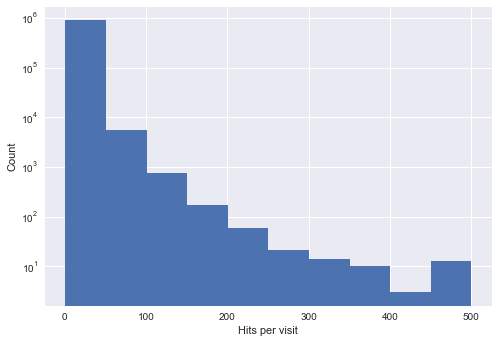

In [175]:
train.hits.hist()
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Hits per visit')
plt.show()

Looks like a reasonable distribution for the hits for these records.  There are more than expected at the very tail, but it is not an extreme outlier.

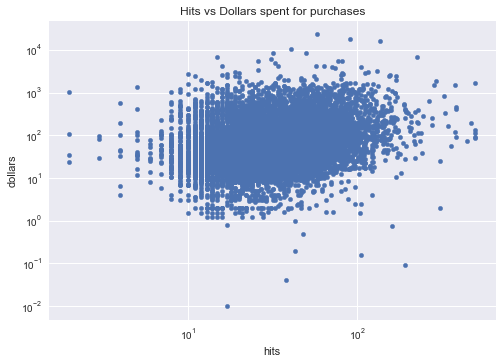

In [176]:
train[train.dollars>0].plot(kind='scatter',x='hits',y='dollars')
plt.yscale('log')
plt.xscale('log')
plt.title('Hits vs Dollars spent for purchases')
plt.show()


In [177]:
### Pearson correlation
r, pval = pearsonr(train.dollars,train.hits)
print(f'Pearson r: {r}, pval: {pval}')

Pearson r: 0.15433564208773037, pval: 0.0


There is a weak positive Pearson correlation and the p-value is ~0, so it is statistically significant.

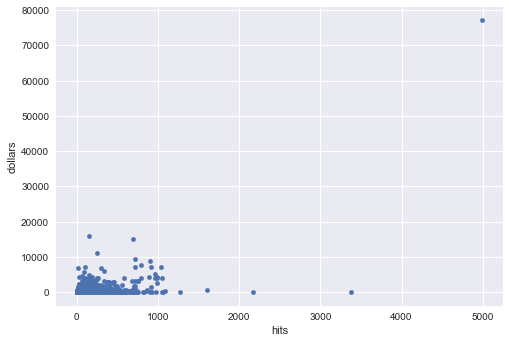

In [178]:
train.groupby('fullVisitorId')[['dollars','hits']].sum().plot(kind='scatter',x='hits',y='dollars')
plt.show()

Looking at the user level reveals an obvious outlier.  Thats a lot of money to spend at the GStore. I don't know if that is a mistake or not, but it won't be able to be predicted from the rest of the data. I'll drop it now.  

In [179]:
train.groupby('fullVisitorId')[['dollars']].sum().sort_values('dollars',ascending=False).head(3)

dollars
fullVisitorId                
1957458976293878100  77113.43
5632276788326171571  16023.75
9417857471295131045  15170.12

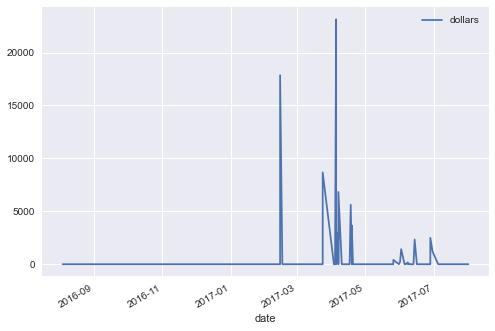

In [180]:
train[train.fullVisitorId=='1957458976293878100'][['date','dollars']].sort_values('date').plot(kind='line',x='date',y='dollars')
plt.show()

Who spends \$17k and then \$23k at the GStore in 2 months? I will drop the records for this user becuase it is wildly anomalous.  

In [181]:
train = train[train.fullVisitorId!='1957458976293878100']

### pageviews
similar to hits. the number of individual pages the visitor access on the website

In [182]:
train.pageviews.value_counts()

1      451619
2      143492
3       73682
4       45110
5       33351
        ...  
196         1
197         1
199         1
208         1
469         1
Name: pageviews, Length: 212, dtype: int64

In [183]:
train.pageviews.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  20,  19,  21,  25,  22,  26,  23,  24,
        30,  27,  29,  28,  32,  31,  34,  33,  38,  35,  40,  36,  37,
        39,  43,  45,  47,  52,  44,  50,  46,  49,  51,  56,  59,  71,
        57,  82,  84,  92,  90,  41,  79, 138,  48,  69, 112,  42,  65,
        60,  63,  68,  58,  74, 165,  53,  54,  55,  61,  70,  80,  78,
        72, 188,  73,  62,  75,  86, 197, 148,  67, 102,  64, 103, 144,
         0,  81, 119, 104, 128,  87, 111,  66,  83, 135,  94,  91,  99,
        77, 118, 127,  93, 106, 155, 117,  76,  89,  85, 143, 105, 115,
        95, 110, 137, 120, 116, 208, 126, 400, 101, 108, 333,  97,  96,
        98, 125, 113, 327, 154, 121, 183, 123, 141, 224,  88, 195, 343,
       156, 193, 150, 122, 145, 174, 100, 202, 147, 131, 169, 164, 249,
       114, 189, 223, 124, 139, 341, 469, 309, 162, 146, 270, 107, 153,
       233, 161, 179, 129, 220, 191, 323, 431, 351, 132, 305, 13

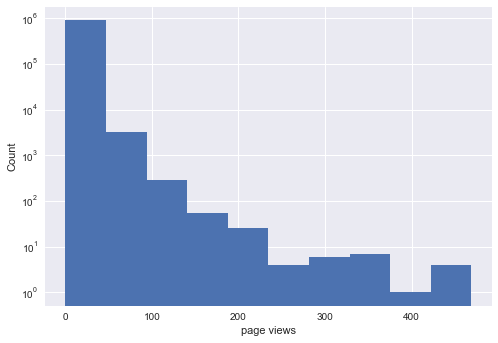

In [184]:
train.pageviews.hist()
plt.yscale('log')
plt.xlabel('page views')
plt.ylabel('Count')
plt.show()

Yes it looks very similar to `hits`. Checking correlation to target and correlation to `hits`

In [185]:
r, pval = pearsonr(train.pageviews,train.dollars)
print(f'Pearson r: {r}, pval: {pval}')

Pearson r: 0.1889989356029213, pval: 0.0


`pageviews` also has a weak positive Pearson correlation to the size of the purchase that is statistically significant.

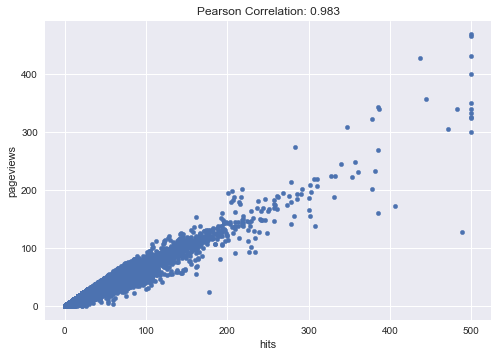

In [186]:
train.plot(kind='scatter',x='hits',y='pageviews')
pearson_r = train[['hits','pageviews']].corr(method='pearson').loc['hits','pageviews']

plt.title('Pearson Correlation: {:.3f}'.format(pearson_r))
plt.show()


`hits` and `pageviews` are highly correlated.  `pageviews` has a slightly higher Pearson correlation to the transaction revenue.  I will keep both for now, but I am sure one will be dropped when I test for multicollinearity.

### bounces

In [187]:
train.bounces.value_counts()

0    452174
1    449733
Name: bounces, dtype: int64

In [188]:
train.groupby('bounces')['dollars'].agg(['count','sum'])

count         sum
bounces                    
0        452174  1462188.03
1        449733        0.00

A bounce is a visitor leaving the page without clicking onto anything. It makes sense then that a 'bounce' of 1 results in no sales revenues.  This will be a key input which will tell the model that there will not be a transaction. 

### newVisits

In [189]:
train.newVisits.value_counts()

1    701732
0    200175
Name: newVisits, dtype: int64

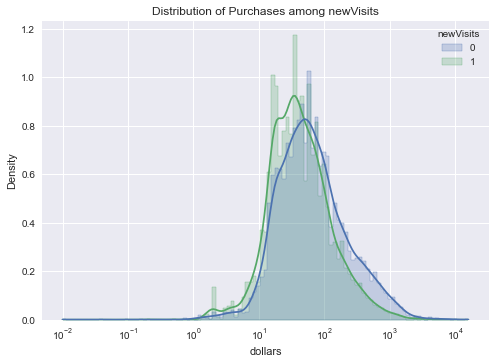

In [190]:
sns.histplot(data=train[train.dollars>0], log_scale=True, x='dollars',hue='newVisits',kde=True, stat='density',common_norm=False, element='step')
plt.title('Distribution of Purchases among newVisits')
plt.show()

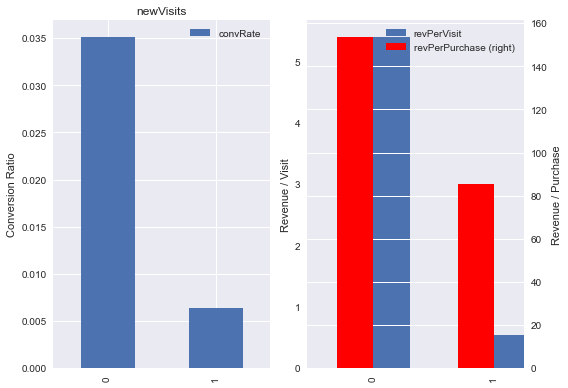

Chi2 Test, chi2: 10241.672, CramersV: 0.107, pval: 0.000


In [191]:
cat_sum = Summarize_categorical(train,'newVisits')

The distributions of purchase sizes among new visitors is higher than the not new visitors to the store. 

The conversion ratio is much higher for repeated visits and the revenue per visit is higher too. 

`newVisits` should correlate to `visitNumber` and I probably won't need it after reformatting the data for modelling.

In [192]:
newvisits = pd.DataFrame(train[['newVisits','visitNumber']].value_counts()).reset_index()
newvisits.pivot(index='visitNumber',columns='newVisits',values=0).head(20)

newVisits          0         1
visitNumber                   
1              123.0  700172.0
2            93024.0    1164.0
3            36623.0     202.0
4            19482.0      79.0
5            11672.0      35.0
6             7589.0      21.0
7             5240.0      15.0
8             3829.0      11.0
9             2901.0       4.0
10            2264.0       3.0
11            1796.0       5.0
12            1461.0       3.0
13            1219.0       2.0
14            1020.0       3.0
15             882.0       1.0
16             763.0       NaN
17             657.0       1.0
18             573.0       1.0
19             503.0       1.0
20             455.0       NaN

There are some records that are tagged as newVisits that have a `visitNumber` greater than 1.  Maybe this is due to when the data was created.  Maybe these users visited in a previous time frame, but when they came back in this time frame they are counted as a `newVisit` in these data. 

### transactRevenue

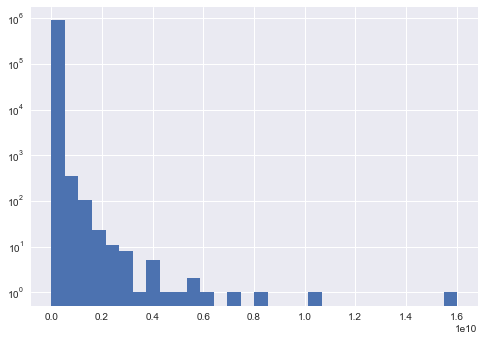

In [193]:
train.transactionRevenue.hist(bins=30)
plt.yscale('log')

This distribution of revenue amounts looks pretty reasonable. Now at the user level

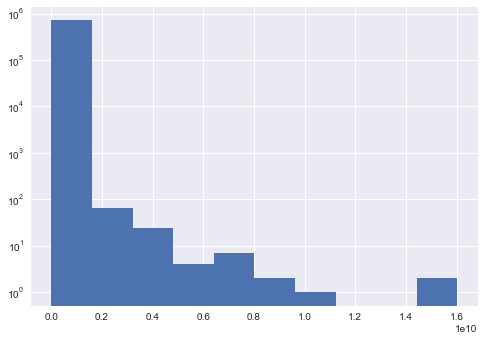

In [194]:
train.groupby('fullVisitorId')['transactionRevenue'].sum().hist()
plt.yscale('log')
plt.show()

Looks pretty good, but there are two very large values that may be outliers.  Lets see how many std's the are from the mean.

In [195]:
by_user = train[train.dollars>0].groupby('fullVisitorId')['transactionRevenue'].sum().sort_values(ascending=False)
by_usermean = np.mean(by_user)
by_userstd = np.std(by_user)
(16023750000-by_usermean)/by_userstd


33.58883917542657

Looks like a big outlier with the top value being 33 std's greater than the mean.

In [196]:
by_user = pd.DataFrame(train[train.dollars>0].groupby('fullVisitorId')['transactionRevenue'].sum().sort_values(ascending=False))
by_user['logRev'] = by_user.transactionRevenue.apply(np.log)

by_usermean = by_user.logRev.mean()
by_userstd = by_user.logRev.std()
(np.log(16023750000)-by_usermean)/by_userstd


4.60599604430583

However, after taking a log transform the large values are less than 5 std's from the mean.  The purchases are distributed lognormally so this makes sense, and I will not drop the two large values.  

Feature profiling done. 
## Key questions to answer
1.  Does 20% of he revenue in fact come from 80% of the customers?
1.  Are repeat visitors more likely to make a purchase?
1.  Where in the world is most of the revenue coming and what level geographical information is best for showing it?


## 1. Is there an imbalance to the GStore revenue in terms of its customers.  Do 20% of the customers account for 80% of the revenue? 

In [197]:
print(f"The percentage of records without a transaction:\n{sum(train.transactionRevenue==0)*100 / train.shape[0]:.1f}%")


The percentage of records without a transaction:
98.7%


The data is heavily imbalanced with ~99% of visits to the GStore not resulting in a transaction. Now let's look at the distribution of revenue by user. 

In [198]:
by_user = train.groupby('fullVisitorId')[['dollars']].sum().sort_values('dollars')
print(by_user.shape)
by_user.describe()

(712871, 1)


dollars
count  712871.000000
mean        2.051126
std        58.548046
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max     16023.750000

There are 714167 unique users in the data, but because there are so many users who didn't make a purchase the summary doesn't mean much.

In [199]:
print(f"\nThe percentage of users with a transaction:\n{sum(by_user.dollars>0)*100/by_user.shape[0]:.1f}%")


The percentage of users with a transaction:
1.4%


Only about 1% of users made a purchase at the store.  I will try to find what is common between them.

In [200]:
### Filter to only users who made purchases

by_user_transacts = by_user[by_user.dollars>0]
by_user_transacts.describe()

dollars
count   9992.000000
mean     146.335872
std      472.722758
min        0.010000
25%       24.487500
50%       48.785000
75%      108.452500
max    16023.750000

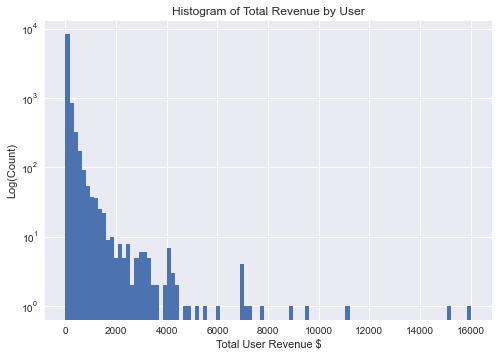

In [201]:
by_user_transacts.dollars.hist(bins=100)
plt.yscale('log')
plt.xlabel('Total User Revenue $')
plt.ylabel('Log(Count)')
plt.title('Histogram of Total Revenue by User');

There are a few very large purchases that are skewing the distribution.  Let's look at the numbers.

In [202]:
by_user_transacts[by_user_transacts.dollars>10000]

dollars
fullVisitorId                
4471415710206918415  11211.10
9417857471295131045  15170.12
5632276788326171571  16023.75

In [203]:
print("{:.1f} std's from mean".format( (by_user_transacts.dollars.max() - by_user_transacts.dollars.mean() ) / by_user_transacts.dollars.std() ))

33.6 std's from mean


I dropped one large outlier above, and as I showed above these other large values are withing 5 std's of the mean after taking the log of the user revenue  

In [204]:
by_user = train.groupby('fullVisitorId')[['dollars']].sum().sort_values('dollars')
by_user_transacts = by_user[by_user.dollars>0]


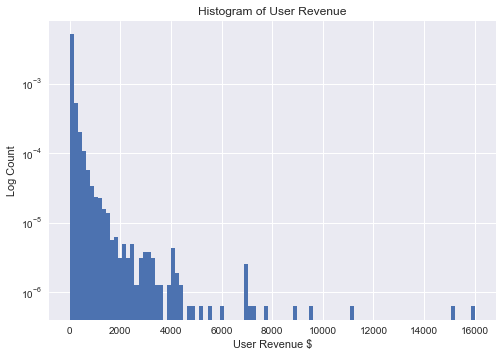

In [205]:
by_user_transacts.dollars.hist(bins=100,density=True)
plt.yscale('log')
plt.xlabel('User Revenue $')
plt.ylabel('Log Count')
plt.title('Histogram of User Revenue')
plt.show()

In [206]:
by_user_transacts['cumulative'] = by_user_transacts.dollars.cumsum()
by_user_transacts['cumulative'] = by_user_transacts['cumulative'] / by_user_transacts.dollars.sum()
perc_users_80p_rev = 100 * by_user_transacts[by_user_transacts.cumulative>.2].shape[0]/by_user_transacts.shape[0]
print('The percentage of purchasers that account for 80% of total revenue:')
print(f'{perc_users_80p_rev:.1f}%')

print('The percentage of all visitors that account for 80% of total revenue:')
perc_vis_80p_rev = 100 * by_user_transacts[by_user_transacts.cumulative>.2].shape[0]/by_user.shape[0]
print(f'{perc_vis_80p_rev:.1f}%')

The percentage of purchasers that account for 80% of total revenue:
26.7%
The percentage of all visitors that account for 80% of total revenue:
0.4%


C:\Users\blain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\blain\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The above calculations show 80% of GStore total revenue came from 26% of the purchasers.  Also, those 26% of users account for more than 99% of the visitors to the store.  This fact is what makes it difficult for the marketing team efficiently invest in marketing for the GStore. 
___
## 2. Are repeat customers more likely to make a purchase? Is the mean purchase of repeat visitors higher?

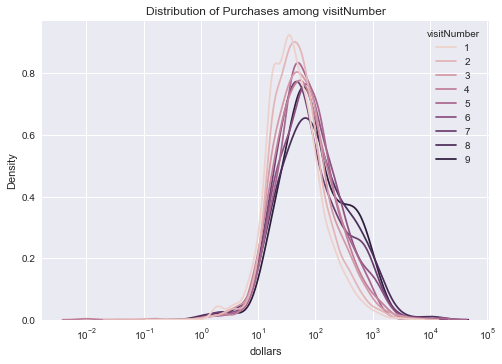

In [207]:
### 2nd question first
#sns.histplot(data=train[(train.dollars>0) & (train.visitNumber<7)], log_scale=True, x='dollars',hue='visitNumber',kde=True, stat='density',common_norm=False, element='poly')
sns.kdeplot(data=train[(train.dollars>0) & (train.visitNumber<10)],log_scale=True,x='dollars',hue='visitNumber', common_norm=False)
plt.title('Distribution of Purchases among visitNumber')
plt.show()

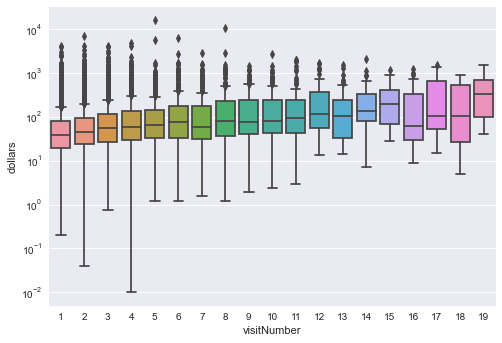

In [208]:
sns.boxplot(data=train[(train.dollars>0) & (train.visitNumber<20)],x='visitNumber',y='dollars')
plt.yscale('log')
plt.show()

It looks like for increasing `visitNumber` the distribution of purchase size shifts up for each increasing visit.  This means purchases of repeated visits tend to be greater than purchases of new visitors.  Does the fraction of visits that result in a purchase increase for repeated visits?

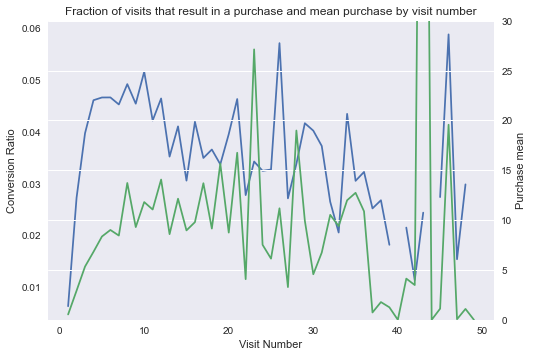

In [209]:
byvisit = pd.DataFrame(train[train.dollars>0]['visitNumber'].value_counts())

byvisit = byvisit.rename(columns={'visitNumber':'purchases'}).join(train.visitNumber.value_counts(),how='outer')

byvisit = byvisit.rename(columns={'visitNumber':'total'})
byvisit['fract'] = byvisit.purchases / byvisit.total
byvisit = byvisit.sort_index(ascending=False)

byvisit = byvisit.join(train.groupby('visitNumber')['dollars'].mean(),how='outer')


ax1=byvisit.loc[byvisit.index<50,'fract'].plot(kind='line')
ax2=byvisit.loc[byvisit.index<50,'dollars'].plot(kind='line',secondary_y=True)

ax1.set_xlabel('Visit Number')
ax1.set_ylabel('Conversion Ratio')
ax2.set_ylabel('Purchase mean')
ax2.set_ylim((0,30))
plt.title('Fraction of visits that result in a purchase and mean purchase by visit number')
plt.show()

Very interesting.  The conversion ratio is very low for first time visitors and then grows steeply for the next ~5 visits.  The conversion ratio peaks around `visitNumber` ~8-10 and then starts to gradually decrease.  

The mean purchase is very low for first visitors and then increases for the first 10 visits. The mean purchase levels off at about 10 visit and gets increasingly noisy. After about ~25-30 visits the mean purchase starts decreasing.  
___
This is not exactly what I was suspecting.  I thought that increasing visits from a user were more likely to result in a purchase and maybe an increase in purchase size, but I didn't expect to see the decline in purchase fraction after the first 10 visits.

In [236]:
print('-'*3+'Pearson Correlation' + '-'*3)
for visits in [5,10,20,30]:

    print(f'First {visits} visits')
    r, p = pearsonr(byvisit.index[:visits], byvisit.fract[:visits])
    print(f'visitNumber to conversion ratio: r: {r:.3f}, p-val: {p:.3f}')
    r, p = pearsonr(byvisit.index[:visits], byvisit.dollars[:visits])
    print(f'visitNumber to mean purchase: r: {r:.3f}, p-val: {p:.3f}')
    print()


---Pearson Correlation---
First 5 visits
visitNumber to conversion ratio: r: 0.929, p-val: 0.023
visitNumber to mean purchase: r: 0.993, p-val: 0.001

First 10 visits
visitNumber to conversion ratio: r: 0.775, p-val: 0.009
visitNumber to mean purchase: r: 0.904, p-val: 0.000

First 20 visits
visitNumber to conversion ratio: r: 0.109, p-val: 0.648
visitNumber to mean purchase: r: 0.657, p-val: 0.002

First 30 visits
visitNumber to conversion ratio: r: -0.020, p-val: 0.917
visitNumber to mean purchase: r: 0.273, p-val: 0.144



Interesting.  It looks like there is a very strong correlation between the users visit number and the conversion ratio as well as the purchase mean for small number of visits <10.  Beyond 10 this correlation breaks down.  I need to try to capture this as a feature somehow.  

In [210]:
### revenue vs visits
by_user = train.groupby('fullVisitorId')[['visitNumber','dollars']].agg({'visitNumber':['max','min'],'dollars':['sum']})
by_user.columns = [col[0]+col[1].capitalize() for col in by_user.columns.values]
by_user['visitCount'] = 1 + by_user.visitNumberMax - by_user.visitNumberMin
by_user.head()

visitNumberMax  visitNumberMin  dollarsSum  visitCount
fullVisitorId                                                              
0000010278554503158               1               1         0.0           1
0000020424342248747               1               1         0.0           1
0000027376579751715               1               1         0.0           1
0000039460501403861               1               1         0.0           1
0000040862739425590               2               1         0.0           2

In [211]:
r, p = pearsonr(by_user.visitCount, by_user.dollarsSum)
print('Correlation between number of visits and total revenue')
print(f'Pearson r: {r:.4f}, p-value: {p}')

Correlation between number of visits and total revenue
Pearson r: 0.1539, p-value: 0.0


''

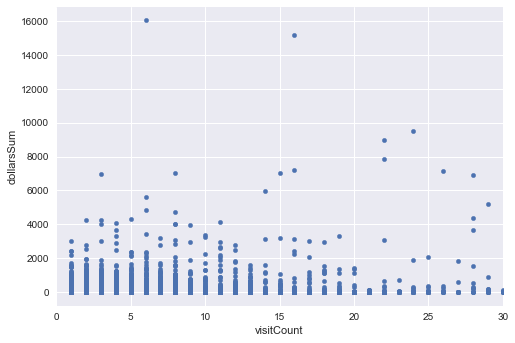

In [237]:
by_user.plot(kind='scatter', x='visitCount', y='dollarsSum')
plt.xlim((0,30))
;

There is strong evidence in the data that there is an association between the number of a users visits and the total amount of money spent by the user.  This would be a useful feature on a user level revenue prediction.

## 3. Where in the world is most of the GStore revenue coming from? What is the best way of geographically categorizing visitors

In [213]:
train.continent.value_counts()
#train.subContinent.value_counts()

N America    408368
Asia         223698
Europe       198311
S America     41731
Oceania       15054
Africa        14745
Name: continent, dtype: int64

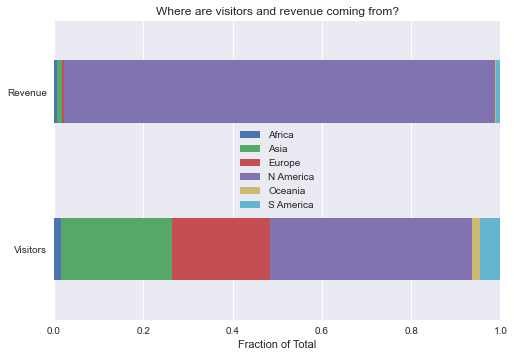

In [214]:
continents = train.groupby('continent')['dollars'].agg(['count','sum'])
continents = continents.transpose()
continents = continents.div(continents.sum(axis=1),axis=0)

continents.plot(kind='barh',stacked=True,width=.4)
plt.xlabel('Fraction of Total')
plt.yticks(ticks=[0,1], labels=['Visitors','Revenue'])
plt.title('Where are visitors and revenue coming from?')
plt.xlim((0,1))
plt.legend(loc='center')
plt.show()

Interesting that even though slightly less than half of the visitors are from North America, the visitors from North America account for almost all of the revenue.  The other two locations with large number of visitors are Asia and Europe.

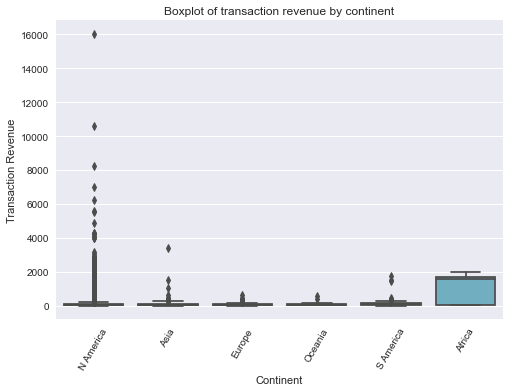

In [215]:
sns.boxplot(data=train[train.dollars>0],
            x='continent',y='dollars')
plt.xticks(rotation=60)
plt.xlabel('Continent')
plt.ylabel('Transaction Revenue')
plt.title('Boxplot of transaction revenue by continent')
plt.show()

It is interesting that the mean purchase from Africa is about 10 times greater than the mean purchase from other continents.  After this surprising observation, let's look at where the big spenders identified earlier are from.

In [216]:
big_spenders=by_user_transacts[by_user_transacts.cumulative>.2].\
    join(train[['fullVisitorId','continent']].set_index('fullVisitorId'),how='left').\
    drop_duplicates()
big_spenders.groupby('continent')['dollars'].agg(['count','sum','mean'])

count         sum         mean
continent                                
Africa         5     9273.35  1854.670000
Asia          59    31463.96   533.287458
Europe        22     9642.20   438.281818
N America   2576  1134785.81   440.522442
Oceania        6     1590.16   265.026667
S America     46    17317.45   376.466304

Among big spenders, North America still dominates with the by far the most purchases and thus creating the most revenue for the GStore.  Interesting the big spenders in Asia also have a fair number of large purchases with a mean almost \$100 higher than that of N America.  

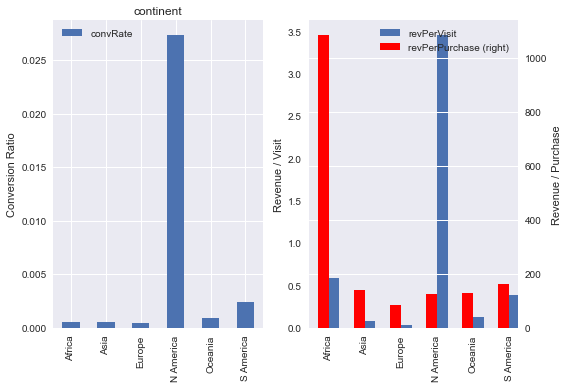

Chi2 Test, chi2: 12667.853, CramersV: 0.119, pval: 0.000


In [217]:
cat_sum = Summarize_categorical(train,'continent')

The highest conversion rate is from North America and it also has the highest revenue per visit.

Now looking at `subContinent`.  Let's see how the smaller divisions of the continents look.

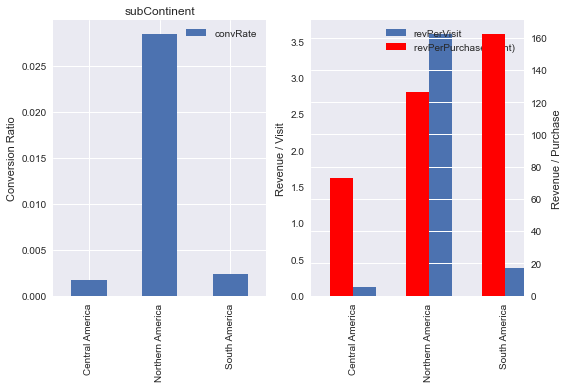

Chi2 Test, chi2: 1415.442, CramersV: 0.056, pval: 0.000


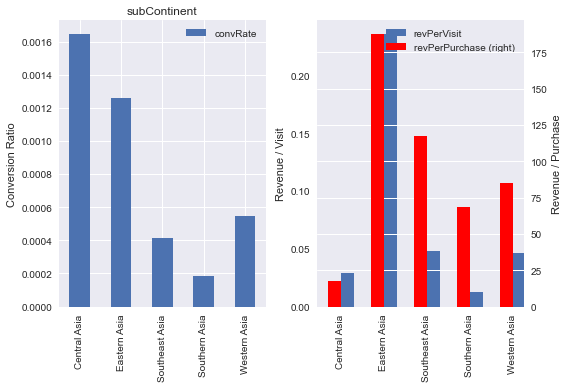

Chi2 Test, chi2: 61.432, CramersV: 0.017, pval: 0.000


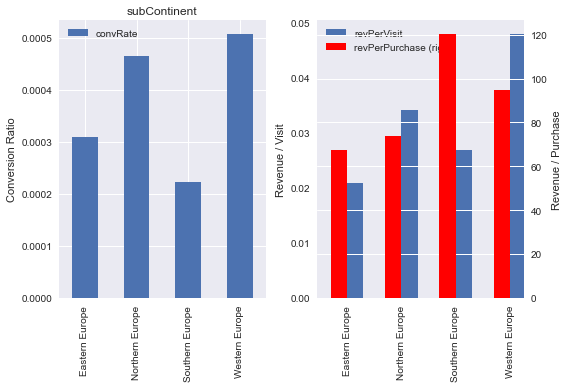

Chi2 Test, chi2: 6.045, CramersV: 0.006, pval: 0.109


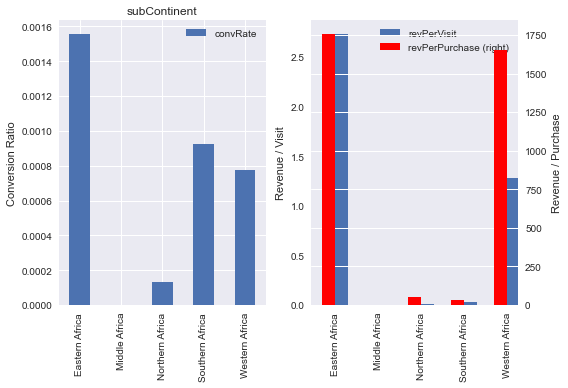

Chi2 Test, chi2: 7.116, CramersV: 0.022, pval: 0.130


In [218]:
for cont in ['America','Asia','Europe','Africa']:
    cat_sum = Summarize_categorical(train[train.subContinent.str.contains(cont)],'subContinent')

There is variation in conversion rate and revenue per visit among the subContinents of each continent.  I think this is an appropriate geographical level to use.  


I believe that geographical categorization that includes `subcontinent`, `state`, and `city` in conjunction with the GDP, population, and life expectency I added earlier will be useful inputs into the model.  


In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901907 entries, 0 to 903652
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   channelGrouping                          901907 non-null  object        
 1   date                                     901907 non-null  datetime64[ns]
 2   fullVisitorId                            901907 non-null  object        
 3   sessionId                                901907 non-null  object        
 4   visitId                                  901907 non-null  int32         
 5   visitNumber                              901907 non-null  int64         
 6   visitStartTime                           901907 non-null  int64         
 7   browser                                  901907 non-null  object        
 8   operatingSystem                          901907 non-null  object        
 9   isMobile                  

In [220]:
train.to_csv('train_eda.csv')

### Finished for now.  Will return if more questions pop up.